<h1 align= "center"> PREDICT THE CANCELLATION OF BOOKED HOTEL </h1>

<img src="https://github.com/bnprayoga/Machine-Learning-Notebooks/blob/ef0ab57074e129a7782dce9de7191d11f9c07e53/img/Booking_Hotel_Img.jpg?raw=true">

## About The Dataset

## Problem Definition
An online travel booking company experienced losses due to uncertain order cancellations by its customers. this company wants to know which customers have a high potential for canceling orders. To overcome this business problem, companies can use various data analysis techniques and predictive modeling. The most possible approach is to utilize customer data and historical order informations to predict which customers are likely to cancel their orders thus eliminate loses.

## Goals
The goal of this project is to create machine learning models that could predict and also give an probability estimate on canceled bookings. The model will also learn from past experience and gives analysis about potential factors affecting cancelation. The model choosen is model which could perform at least 90% precision treshold on test set and maximum recall. whileareas, time for prediction is not a great factore to be considered

## Features Description
* **hotel :** Type of hotel (Resort Hotel, City Hotel)
* **lead_time :** Number of days between booking and arrival
* **arrival_date_year :** Year of arrival
* **arrival_date_month :** Month of arrival
* **arrival_date_week_number :** Week number of the year for arrival
* **arrival_date_day_of_month :** Day of the month of arrival
* **stays_in_weekend_nights :** Number of weekend nights (Saturday and Sunday) the guest stayed or booked
* **stays_in_week_nights :** Number of week nights the guest stayed or booked
* **adults :** Number of adults
* **children :** Number of children
* **babies :** Number of babies
* **meal :** Type of meal booked (BB, FB, HB, SC, Undefined)
* **country :** Country of origin of the guest
* **market_segment :** Market segment designation
* **distribution_channel :** Booking distribution channel
* **is_repeated_guest :** If the guest is a repeat customer (0 = not repeated, 1 = repeated)
* **previous_cancellations :** Number of previous bookings that were canceled by the customer
* **previous_bookings_not_canceled :** Number of previous bookings that were not canceled by the customer
* **reserved_room_type :** Type of reserved room
* **assigned_room_type :** Type of assigned room
* **booking_changes :** Number of changes made to the booking
* **deposit_type :** Type of deposit made (No Deposit, Refundable, Non Refund)
* **agent :** ID of the travel agent responsible for the booking
* **company :** ID of the company responsible for the booking
* **days_in_waiting_list :** Number of days the booking was in the waiting list
* **customer_type :** Type of customer (Transient, Contract, Transient-Party, Group)
* **adr :** Average Daily Rate which measures the average rental revenue earned for an occupied room per day
* **required_car_parking_spaces :** Number of car parking spaces required
* **total_of_special_requests :** Number of special requests made
* **reservation_status :** Last reservation status (Check-Out, Canceled, No-Show)
* **reservation_status_date :** Date of the last reservation status

## Target Description
* **is_canceled :** Reservation cancellation status (0 = not canceled, 1 = canceled)

# 1. Import Libraries

In [ ]:
#import libraries for data analysis
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

#libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.transforms as transforms
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Libraries for Data Preparation
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

#Libraries for Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Libraries for Model Evaluation
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score

#save machine learning results
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#user settings

#set the format of max number of decimal on float Dtypes
pd.options.display.float_format = "{:.2f}".format
#set max columns displayed in pandas to 40 columns
pd.options.display.max_columns = 40
pd.options.display.max_rows = 200

#name of the month order
monthly_cat = CategoricalDtype(categories=['January',
                                           'February',
                                           'March',
                                           'April',
                                           'May',
                                           'June',
                                           'July',
                                           'August',
                                           'September',
                                           'October',
                                           'November',
                                           'December'], ordered=True)

#name of the day order
daily_cat = CategoricalDtype(categories=['Sunday',
                                         'Monday',
                                         'Tuesday',
                                         'Wednesday',
                                         'Thursday',
                                         'Friday',
                                         'Saturday'], ordered=True)

In [ ]:
#user defined function
#function fo get the values of datetime object
def expand_date(df, datetime_col : 'str', columns_returned : 'str|list|tuple' = 'all'):
  dfc = df.copy()

  dfc['Day'] = dfc[datetime_col].dt.day
  dfc['Day'] = dfc['Day'].astype('O')

  dfc['Month'] = dfc[datetime_col].dt.month
  dfc['Month'] = dfc['Month'].astype('O')

  dfc['Year'] = dfc[datetime_col].dt.year
  dfc['Year'] = dfc['Year'].astype('O')

  dfc['Month_Name'] = dfc[datetime_col].dt.month_name()
  dfc['Month_Name'] = dfc['Month_Name'].astype(monthly_cat)

  dfc['Day_Name'] = dfc[datetime_col].dt.day_name()
  dfc['Day_Name'] = dfc['Day_Name'].astype(daily_cat)

  dfc['Week_of_Year'] = dfc[datetime_col].dt.isocalendar().week
  dfc['Week_of_Year'] = dfc['Week_of_Year'].astype('O')

  dfc['Day_of_Year'] = dfc[datetime_col].dt.dayofyear
  dfc['Day_of_Year'] = dfc['Day_of_Year'].astype('O')

  dfc['Quarter'] = dfc[datetime_col].dt.quarter
  dfc['Quarter'] = dfc['Quarter'].astype('O')

  if columns_returned == 'all': return dfc
  else: return pd.concat((df, dfc[columns_returned]), axis=1)

# 2. Load and Read Dataset

In [ ]:
#dataset link from github
dataset_permalink = 'https://github.com/bnprayoga/Machine-Learning-Notebooks/blob/22a150aa3be37a105f7d921643d1bf9585a16344/dataset/hotel_bookings.csv'
raw = '?raw=true'
local_path = './hotel_bookings.csv'

#loead and read dataset
df = pd.read_csv(dataset_permalink+raw, delimiter=',')

#dropping duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

#process of loading data can takes time up to a few minutes, so I create an archive of initally downloaded dataframe
df_arc = df.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


# 3. Dataset Overview

## 3.1 General Information

In [ ]:
#see general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            

## 3.2 Change Dtypes

In [ ]:
categorical_dtypes_columns = [
    "hotel",
    "is_canceled",
    "arrival_date_year",
    "arrival_date_month",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "meal",
    "country",
    "market_segment",
    "distribution_channel",
    "is_repeated_guest",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "agent",
    "company",
    "customer_type",
    "reservation_status"
]

#change columns that should be in categorical Dtypes
for column in categorical_dtypes_columns:
    df[column] = df[column].astype(str)

## 3.2 Dataset Global Statistic

### 3.2.1 Statistics of Categorical Dtypes

In [ ]:
#See Categorical Dtypes Statistic
df_catdesc = df[categorical_dtypes_columns].describe().T
df_catdesc = df_catdesc.assign(percent_frec = lambda x: 100*x['freq']/x['count'])
df_catdesc

,count,unique,top,freq,percent_frec
hotel,87396,2,City Hotel,53428,61.13
is_canceled,87396,2,0,63371,72.51
arrival_date_year,87396,3,2016,42391,48.50
arrival_date_month,87396,12,August,11257,12.88
arrival_date_week_number,87396,53,33,2793,3.20
arrival_date_day_of_month,87396,31,17,3020,3.46
meal,87396,5,BB,67978,77.78
country,87396,178,PRT,27453,31.41
market_segment,87396,8,Online TA,51618,59.06
distribution_channel,87396,5,TA/TO,69141,79.11


**Useful Insights**:
* **hotel** = The most booked hotel type is City Hotel (66.45%)
* **is_canceled** = This is very intereseting, from raw data, the guest who doesn't canceled hotel reservation is only 62.96%.
* **meal** = 77.32% meals ordered is type 'BB' from avalable 5 meal types.
* **country** = 40.70% guest is from PRT (Portugal) from total 178 different countries.
* **distribution_chanel** = 81.98% distribution channel comes from 'TA/TO' from 5 different distribution channel.
* **is_repeated_guest** = 96.81% guest is guest who has been resevered hotel, only few that are the new guest
* **reserved and assigned_room_type** = the most is type A
* **deposit_type** = 87.65% guest take no deposit when booked hotel
* **customers_type** = 75% customer is Transient


### 3.2.2 Statistic of Numerical Dtypes

In [ ]:
df_numdesc = df.select_dtypes(exclude = 'object').describe().T
df_numdesc

,count,mean,std,min,25%,50%,75%,max
lead_time,87396.00,79.89,86.05,0.00,11.00,49.00,125.00,737.00
stays_in_weekend_nights,87396.00,1.01,1.03,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,87396.00,2.63,2.05,0.00,1.00,2.00,4.00,50.00
adults,87396.00,1.88,0.63,0.00,2.00,2.00,2.00,55.00
children,87392.00,0.14,0.46,0.00,0.00,0.00,0.00,10.00
babies,87396.00,0.01,0.11,0.00,0.00,0.00,0.00,10.00
previous_cancellations,87396.00,0.03,0.37,0.00,0.00,0.00,0.00,26.00
previous_bookings_not_canceled,87396.00,0.18,1.73,0.00,0.00,0.00,0.00,72.00
booking_changes,87396.00,0.27,0.73,0.00,0.00,0.00,0.00,21.00
days_in_waiting_list,87396.00,0.75,10.02,0.00,0.00,0.00,0.00,391.00


# 4. Data Preprocessing

## 4.1 Remove Features That Not Correlated towards Target

In [ ]:
#define correlated columns with target
target_correlated_columns = ['assigned_room_type', 'reservation_status', 'reservation_status_date']

#removing correlated columns
df.drop(columns=target_correlated_columns, inplace=True)

## 4.2 Handling Error Data

In [ ]:
#store indexes of Error Data
index_adults0 = df[df['adults']==0].index
index_minADR = df[df['adr']<0].index

#check the total rows of error data
print(f"Total number of booked hotels by non-adults \t: {len(df.iloc[index_adults0,:])} rows")
print(f"Total number of minus ADR \t\t\t: {len(df.iloc[index_minADR,:])} rows")

Total number of booked hotels by non-adults 	: 385 rows
Total number of minus ADR 			: 1 rows


In [ ]:
#remove error rows
df.drop(index_adults0, axis=0, inplace=True)
df.drop(index_minADR, axis=0, inplace=True)

## 4.3 Create Arrival Date Features

In [ ]:
#create arrival date features, for fancy way of analysis
df['arrival_date'] = pd.to_datetime(df["arrival_date_day_of_month"]+" "+df["arrival_date_month"]+" "+df["arrival_date_year"])

#see the result
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,nan,nan,0,Transient,0.00,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,nan,nan,0,Transient,0.00,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,nan,nan,0,Transient,75.00,0,0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,nan,0,Transient,75.00,0,0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,nan,0,Transient,98.00,0,1,2015-07-01


## 4.4 Handling Missing Values

In [ ]:
def check_null(df, null_only=False):
    result = pd.DataFrame(df.isnull().sum(axis=0), columns = ['total_null'])
    result = result.assign(percent_null = lambda x: 100*x.total_null/len(df))
    if null_only:
        result = result[result['total_null']>0]
    return result

In [ ]:
#see the column that has Null value
check_null(df, null_only=True)

,total_null,percent_null
children,4,0.00


In [ ]:
#check the data
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
34241,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,0,No Deposit,nan,nan,0,Transient-Party,12.00,0,1,2015-08-03
34274,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,0,No Deposit,14.0,nan,0,Transient-Party,12.00,0,1,2015-08-05
34278,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,0,No Deposit,nan,nan,0,Transient-Party,18.00,0,2,2015-08-05
34586,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,0,No Deposit,9.0,nan,0,Transient-Party,76.50,0,1,2015-08-13


In [ ]:
#fill null value with mode
df.loc[df['children'].isna(), 'children'] = df.children.mode()

## 4.5 Remove Features that Unrellevant to The Model

In [ ]:
#choosed features that are not as variable of interest
neglected_columns = ["agent", "company", "arrival_date_week_number", "arrival_date_year"]

**Reasons why thoose 3 columns are neglected:**
* both **agent** and **Company** columns are columns that represets the unique ID for each customer that booked the hotel. Since we are not try to build model based on ID of customer, it also has a infinite numbers of IDs (High cardinality). But, If we are interesed in finding who was customer that has the highest or the lowest booking order within a certain period, than it good to go to include this on our dataset.
* **arrival_date_week_number**, obviously this is high cardinality column (52 unique column). I just represet date, but on weekly basis, that the arrival of customer will come. I personally do not interested to include this on the model, but I prefer to use another features that represent date, such as month or holidays.
* **arrival_date_year**, we want to built model that independent of year. We only care about the period of the arrival of the guest. but we will keep **arrival_date** as a new insight

In [ ]:
df.drop(columns=neglected_columns, inplace=True)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,July,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.00,0,0,2015-07-01
1,Resort Hotel,0,737,July,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.00,0,0,2015-07-01
2,Resort Hotel,0,7,July,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,2015-07-01
3,Resort Hotel,0,13,July,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.00,0,0,2015-07-01
4,Resort Hotel,0,14,July,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.00,0,1,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,August,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,0,Transient,96.14,0,0,2017-08-30
87392,City Hotel,0,102,August,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,0,No Deposit,0,Transient,225.43,0,2,2017-08-31
87393,City Hotel,0,34,August,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,0,No Deposit,0,Transient,157.71,0,4,2017-08-31
87394,City Hotel,0,109,August,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,104.40,0,0,2017-08-31


for the sake of convinient on reading dataset, lets try to re-arrange the column location

In [ ]:
#renaming dataframe
df.rename({
    "hotel" : "hotel_type",
    "stays_in_weekend_nights" : "n_stays_in_weekend_nights",
    "stays_in_week_nights" : "n_stays_in_week_nights",
    "adults" : "n_adults",
    "children" : "n_children",
    "babies" : "n_babies",
    "meal" : "meal_type",
    "previous_cancellations" : "n_previous_cancellations",
    "previous_bookings_not_canceled" : "n_previous_bookings_not_canceled",
    "booking_changes" : "n_booking_changes",
    "adr" : "average_daily_rate",
}, axis=1, inplace=True)

In [ ]:
#re-arrange dataset
columns_sorted = [
    #tells us about bookings
    "hotel_type",
    "reserved_room_type",
    "deposit_type",
    "average_daily_rate",
    "n_stays_in_weekend_nights",
    "n_stays_in_week_nights",
    "n_booking_changes",
    "required_car_parking_spaces",
    "total_of_special_requests",

    #tells us about for when the bookings
    "arrival_date",
    "arrival_date_month",
    "arrival_date_day_of_month",
    "lead_time",
    "days_in_waiting_list",

    #tells us about who booked the hotel
    "market_segment",
    "distribution_channel",
    "customer_type",
    "country",
    "n_adults",
    "n_children",
    "n_babies",
    "meal_type",

    #tells us about historical data of customers
    "is_repeated_guest",
    "n_previous_cancellations",
    "n_previous_bookings_not_canceled",

    #tells us about the booking was canceled or not
    "is_canceled"
]

In [ ]:
df = df[columns_sorted]
df.head(3)

,hotel_type,reserved_room_type,deposit_type,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_date_month,arrival_date_day_of_month,lead_time,days_in_waiting_list,market_segment,distribution_channel,customer_type,country,n_adults,n_children,n_babies,meal_type,is_repeated_guest,n_previous_cancellations,n_previous_bookings_not_canceled,is_canceled
0,Resort Hotel,C,No Deposit,0.00,0,0,3,0,0,2015-07-01,July,1,342,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0
1,Resort Hotel,C,No Deposit,0.00,0,0,4,0,0,2015-07-01,July,1,737,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0
2,Resort Hotel,A,No Deposit,75.00,0,1,0,0,0,2015-07-01,July,1,7,0,Direct,Direct,Transient,GBR,1,0.00,0,BB,0,0,0,0


In [ ]:
len(df.select_dtypes(include='O'))
len(df.select_dtypes(exclude='O'))

87010

## 4.6 Handling Missing Values

In [ ]:
df.isnull().sum()

hotel_type                          0
reserved_room_type                  0
deposit_type                        0
average_daily_rate                  0
n_stays_in_weekend_nights           0
n_stays_in_week_nights              0
n_booking_changes                   0
required_car_parking_spaces         0
total_of_special_requests           0
arrival_date                        0
arrival_date_month                  0
arrival_date_day_of_month           0
lead_time                           0
days_in_waiting_list                0
market_segment                      0
distribution_channel                0
customer_type                       0
country                             0
n_adults                            0
n_children                          4
n_babies                            0
meal_type                           0
is_repeated_guest                   0
n_previous_cancellations            0
n_previous_bookings_not_canceled    0
is_canceled                         0
dtype: int64

In [ ]:
df["n_children"].fillna(0, inplace=True)
df.n_children.value_counts()

n_children
0.00     78865
1.00      4691
2.00      3389
3.00        64
10.00        1
Name: count, dtype: int64

## 4.7 Save Data for Further Analysis

In [ ]:
#save the data for Exploratory Data Analysis to CSV file and analyze it in Power BI
"""
in Power BI, since decimal represented in comma ',' we need to specify the decimal into comma too.
this can be done using decimal argument on pd.to_csv() method
"""

#df.to_csv('./hotel_bookings_cleaned.csv',
#         sep = ';', decimal=',', index=False)

"\nin Power BI, since decimal represented in comma ',' we need to specify the decimal into comma too.\nthis can be done using decimal argument on pd.to_csv() method\n"

# 5 Exploratory Data Analysis

### Basic Question (?)
* What is the percentage of cancellations towards total number of bookings?
* Historical Number of Bookings and Number of Cancelled Bookings?
* How is customers compositions looks like?, their type, country, and segment? and how is customers composition effect Bookings Cancellation?
* Who is the customers that more likely to cancel orders, old or new customers?
* What is the effect of hotel type, reserved room type, deposite type, and the type of meal towards booking cancellation?
* The effect of other numerical variables towards Cancellation?

* ### What is the percentage of cancellation towards total number of bookings?

In [ ]:
labels = ['Not Canceled', 'Canceled']
values = [df.is_canceled.value_counts()[0], df.is_canceled.value_counts()[1]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.15])])
fig.update_traces(hoverinfo='skip', textinfo='label+value+percent')
fig.update_layout(title_text = f"Bookings Cancellation from Total {len(df)} Bookings",
                  showlegend=False)

fig.show()

> around 27.5% bookings was canceled, which is 23.928 bookings from 87.010 bookings.

* ### Historical Number of Bookings and Number of Cancelled Bookings?

In [ ]:
booking_hist = pd.pivot_table(df, index = ['arrival_date','is_canceled'], values='hotel_type', aggfunc='count')
booking_hist.rename({'hotel_type':'number_of_bookings'}, axis=1, inplace=True)
booking_hist.reset_index(inplace=True)
booking_hist['is_canceled'] = booking_hist['is_canceled'].apply(lambda x: 'Not Canceled' if x=='0' else 'Canceled')
booking_hist = expand_date(booking_hist, 'arrival_date')

#see the result
booking_hist.head()

,arrival_date,is_canceled,number_of_bookings,Day,Month,Year,Month_Name,Day_Name,Week_of_Year,Day_of_Year,Quarter
0,2015-07-01,Not Canceled,42,1,7,2015,July,Wednesday,27,182,3
1,2015-07-01,Canceled,11,1,7,2015,July,Wednesday,27,182,3
2,2015-07-02,Not Canceled,35,2,7,2015,July,Thursday,27,183,3
3,2015-07-02,Canceled,19,2,7,2015,July,Thursday,27,183,3
4,2015-07-03,Not Canceled,32,3,7,2015,July,Friday,27,184,3


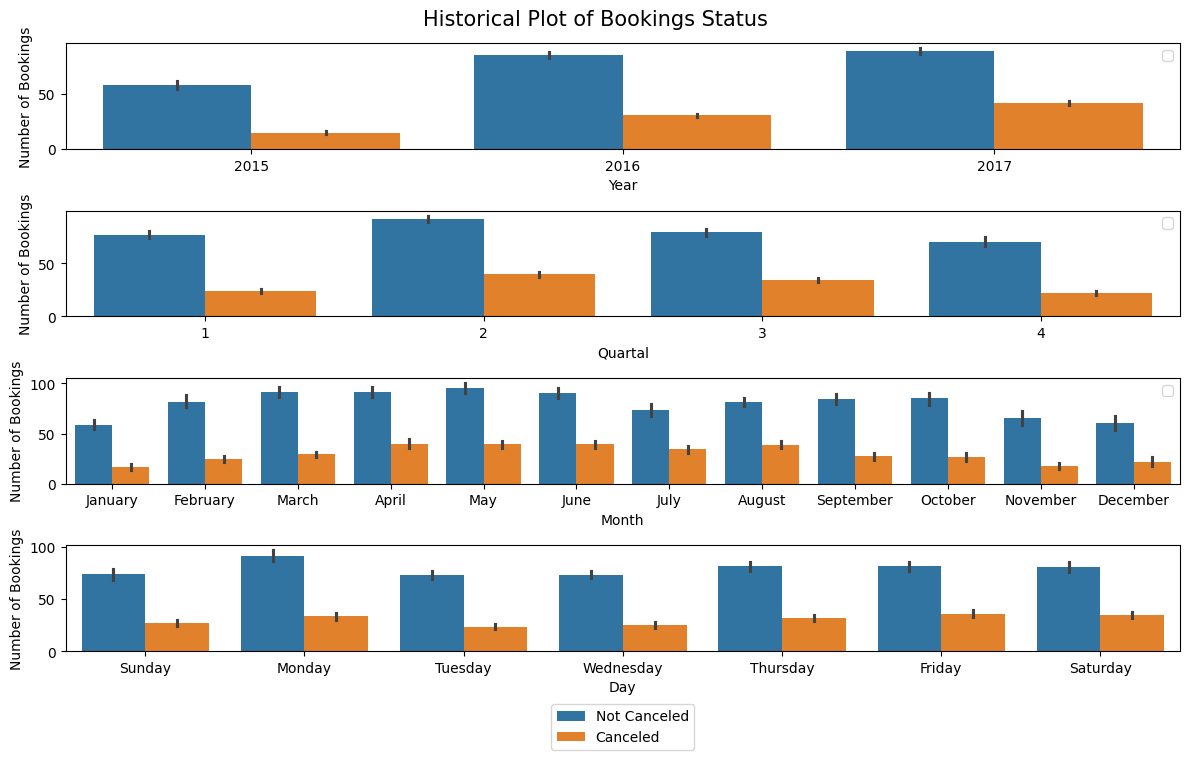

In [ ]:
#plot weekly seasonal component
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (12, 8))

sns.barplot(booking_hist, y = 'number_of_bookings', x = 'Year', hue = 'is_canceled',
             palette = sns.color_palette('tab10')[:3], ax = ax1)
sns.barplot(booking_hist, y = 'number_of_bookings', x = 'Quarter', hue = 'is_canceled',
             palette = sns.color_palette('tab10')[:3], ax = ax2)
sns.barplot(booking_hist, y = 'number_of_bookings', x = 'Month_Name', hue = 'is_canceled',
             palette = sns.color_palette('tab10')[:3], ax = ax3)
sns.barplot(booking_hist, y = 'number_of_bookings', x = 'Day_Name', hue = 'is_canceled',
             palette = sns.color_palette('tab10')[:3], ax = ax4)

#set x and y labels
ax1.set_xlabel('Year'), ax1.set_ylabel('Number of Bookings')
ax2.set_xlabel('Quartal'), ax2.set_ylabel('Number of Bookings')
ax3.set_xlabel('Month'), ax3.set_ylabel('Number of Bookings')
ax4.set_xlabel('Day'), ax4.set_ylabel('Number of Bookings')

#remove legened
ax1.legend("")
ax2.legend("")
ax3.legend("")
ax4.legend(loc="lower center", bbox_to_anchor=(0.5,-1,0,0))

#create title and combine all plots
f.suptitle('Historical Plot of Bookings Status', size = 15)
f.tight_layout()
plt.show();

In [ ]:
percent_canceled_hist = booking_hist.pivot(index='arrival_date', columns='is_canceled', values='number_of_bookings') \
                                    .assign(percent_canceled = lambda x: 100*x['Canceled']/(x['Canceled'] + x['Not Canceled']))['percent_canceled'].reset_index()

percent_canceled_hist = expand_date(percent_canceled_hist, 'arrival_date')
percent_canceled_hist

,arrival_date,percent_canceled,Day,Month,Year,Month_Name,Day_Name,Week_of_Year,Day_of_Year,Quarter
0,2015-07-01,20.75,1,7,2015,July,Wednesday,27,182,3
1,2015-07-02,35.19,2,7,2015,July,Thursday,27,183,3
2,2015-07-03,37.25,3,7,2015,July,Friday,27,184,3
3,2015-07-04,33.33,4,7,2015,July,Saturday,27,185,3
4,2015-07-05,28.85,5,7,2015,July,Sunday,27,186,3
...,...,...,...,...,...,...,...,...,...,...
788,2017-08-27,28.92,27,8,2017,August,Sunday,34,239,3
789,2017-08-28,39.19,28,8,2017,August,Monday,35,240,3
790,2017-08-29,31.25,29,8,2017,August,Tuesday,35,241,3
791,2017-08-30,29.41,30,8,2017,August,Wednesday,35,242,3


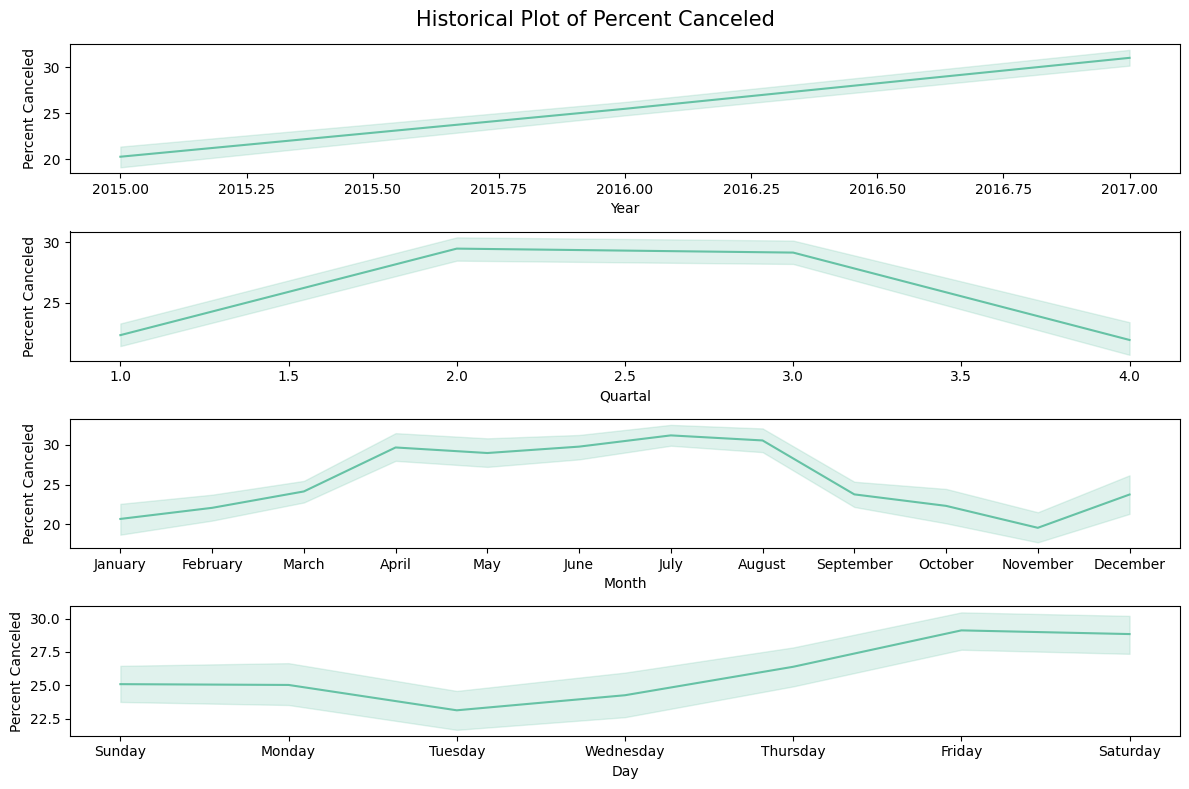

In [ ]:
cpal = sns.color_palette('Set2')[0]

#plot weekly seasonal component
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (12, 8))
sns.lineplot(percent_canceled_hist, y = 'percent_canceled', x = 'Year',
            color = cpal, ax = ax1)
sns.lineplot(percent_canceled_hist, y = 'percent_canceled', x = 'Quarter',
            color = cpal, ax = ax2)
sns.lineplot(percent_canceled_hist, y = 'percent_canceled', x = 'Month_Name',
            color = cpal, ax = ax3)
sns.lineplot(percent_canceled_hist, y = 'percent_canceled', x = 'Day_Name',
            color = cpal, ax = ax4)

#set x and y labels
ax1.set_xlabel('Year'), ax1.set_ylabel('Percent Canceled')
ax2.set_xlabel('Quartal'), ax2.set_ylabel('Percent Canceled')
ax3.set_xlabel('Month'), ax3.set_ylabel('Percent Canceled')
ax4.set_xlabel('Day'), ax4.set_ylabel('Percent Canceled')

#create title and combine all plots
f.suptitle('Historical Plot of Percent Canceled', size = 15)
f.tight_layout()
plt.show();

* The number of cancelations increases each year (about 5% per year)
* This occurs in the beginning of second Quartal to the middle of third Quartal (April to August)
* The percent cancelations is increasing in the end of the week

* ### How is customers compositions looks like?, their type, country, and segment? and how is customers composition effect Bookings Cancellation?

In [ ]:
customers_df = df[['customer_type', 'country', 'market_segment', 'is_canceled']].copy()
customers_df.head()

,customer_type,country,market_segment,is_canceled
0,Transient,PRT,Direct,0
1,Transient,PRT,Direct,0
2,Transient,GBR,Direct,0
3,Transient,GBR,Corporate,0
4,Transient,GBR,Online TA,0


In [ ]:
cstypes = df.customer_type.value_counts()
mktsg = df.market_segment.value_counts()
cscnty = df.country.value_counts()

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=cstypes.index, values=cstypes, name="Customer Type"),
              1, 1)
fig.add_trace(go.Pie(labels=mktsg.index, values=mktsg, name="Market Segment"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, textinfo='label+percent')

fig.update_layout(
    title_text="Customers Composition",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='type', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='segment', x=0.82, y=0.5, font_size=20, showarrow=False)],
    showlegend=False)

fig.show()

* 82.5% customers is identified as Transient Type of Customer, 13.3% identified as Transient-Party, 3.6% as Contract, and 0.62% Group
* Mostly, our customers is from Online Segement Customer (59%), then Offline (15.9%), Direct (13.5%), group (5.66%), and the rest comes from others Market Segment

In [ ]:
def create_grouped_df(df, groupby, cols="is_canceled", pround=2):
    #create dataframe
    df = df.groupby(groupby)[cols].value_counts() \
           .unstack().fillna(0).assign(total_booking=lambda x: x["0"]+x["1"],
                                  percent_canceled=lambda x: (x["1"]/(x["0"]+x["1"]))*100).round(pround)
    return df

def plot_stacked_bars(df, groupby, cols="is_canceled", pround=2,
                     title=None, fgsize= (10,5), txt1_adj=4000, txt2_adj=1000, return_df=False):

    #dataframe creation
    df = create_grouped_df(df, groupby, cols, pround)

    f, x = plt.subplots(1, 1, figsize=fgsize)

    x.bar(df.index, df.loc[:,"0"])
    x.bar(df.index, df.loc[:,"1"], bottom=df.loc[:,"0"], color="red")
    plt.ylim(0, df.loc[:,"total_booking"].max()+10000)
    plt.title(title)

    #adding labels
    for i in df.index:
        plt.text(x=i,
                 y=df.loc[i, "0"]+df.loc[i, "1"]+txt1_adj,
                 s="QTY Total: "+str(df.loc[i, "0"]+df.loc[i, "1"]),
                 ha="center")
        plt.text(x=i,
                 y=df.loc[i, "0"]+df.loc[i, "1"]+txt2_adj,
                 s="Canceled: " + str(df.loc[i, "1"]) + "("+str(df.loc[i, "percent_canceled"])+" %)",
                 ha="center")

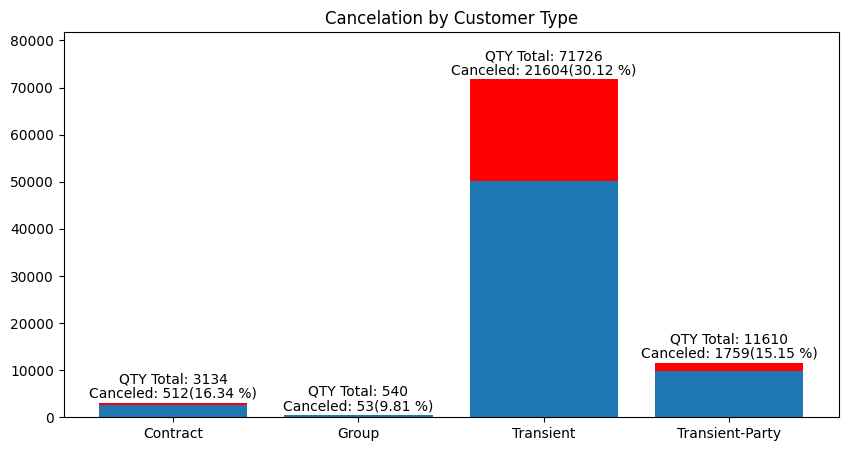

In [ ]:
plot_stacked_bars(df, "customer_type", title="Cancelation by Customer Type")

* During 2015 to 2017, Transient type customers is the most custumers type likely to canceled bookings (30.12%), and the least customers likely to canceled is Group (9.81%)

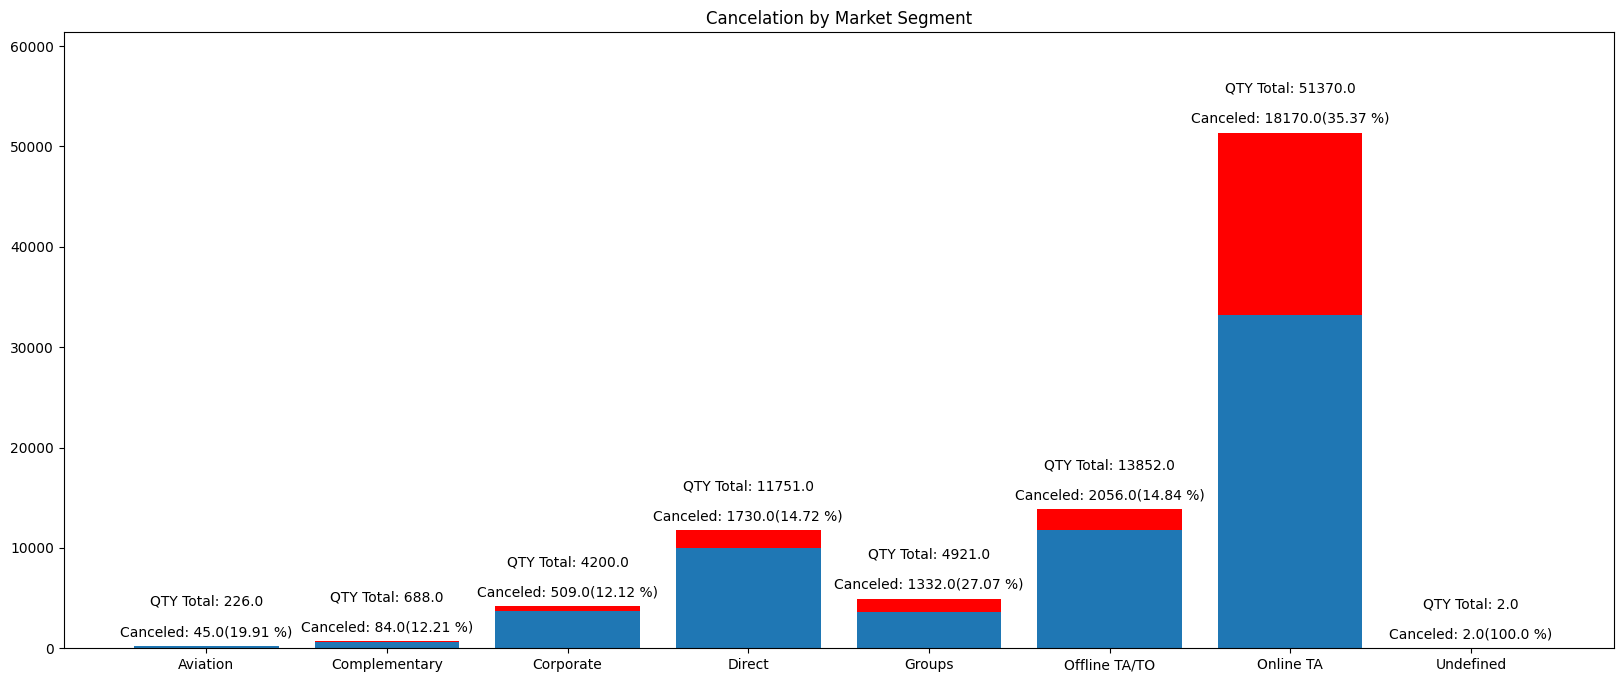

In [ ]:
plot_stacked_bars(df, "market_segment", title="Cancelation by Market Segment", fgsize=(20, 8))

* During 2015 to 2017, customers who book Online is the most likely to canceled bookings (35.37%), and the least customers likely to canceled is Corporate (12.12%)
* There is unidentified segment of Customers. we will change this to 'Online' customer segment as it is the biggest Customer segment

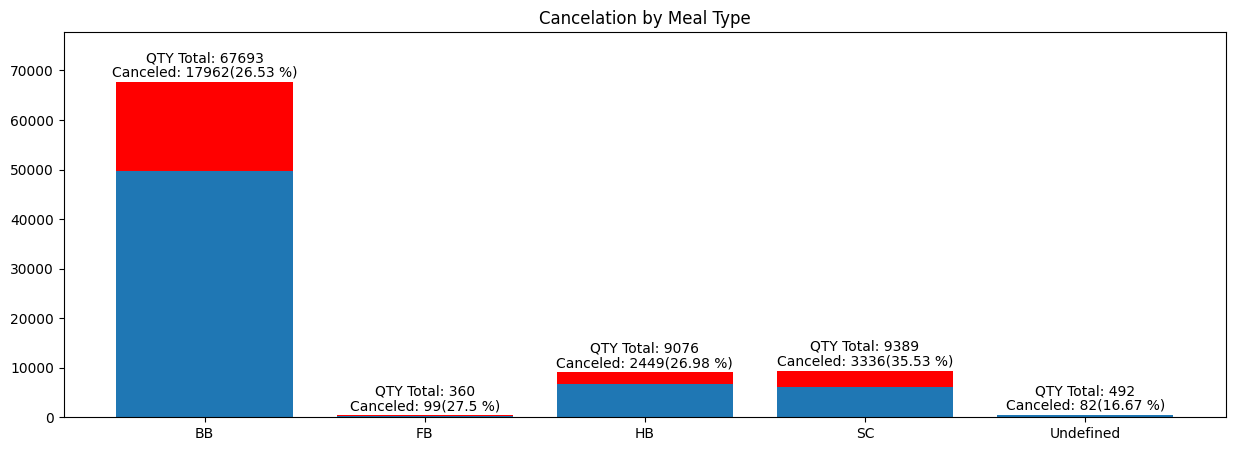

In [ ]:
plot_stacked_bars(df, "meal_type", title="Cancelation by Meal Type", fgsize=(15,5))

* around 35.53% customers who order food type 'SC' canceled the bookings. And customer who who order other type of food, only account account for 26.53 to 27.5% canceled

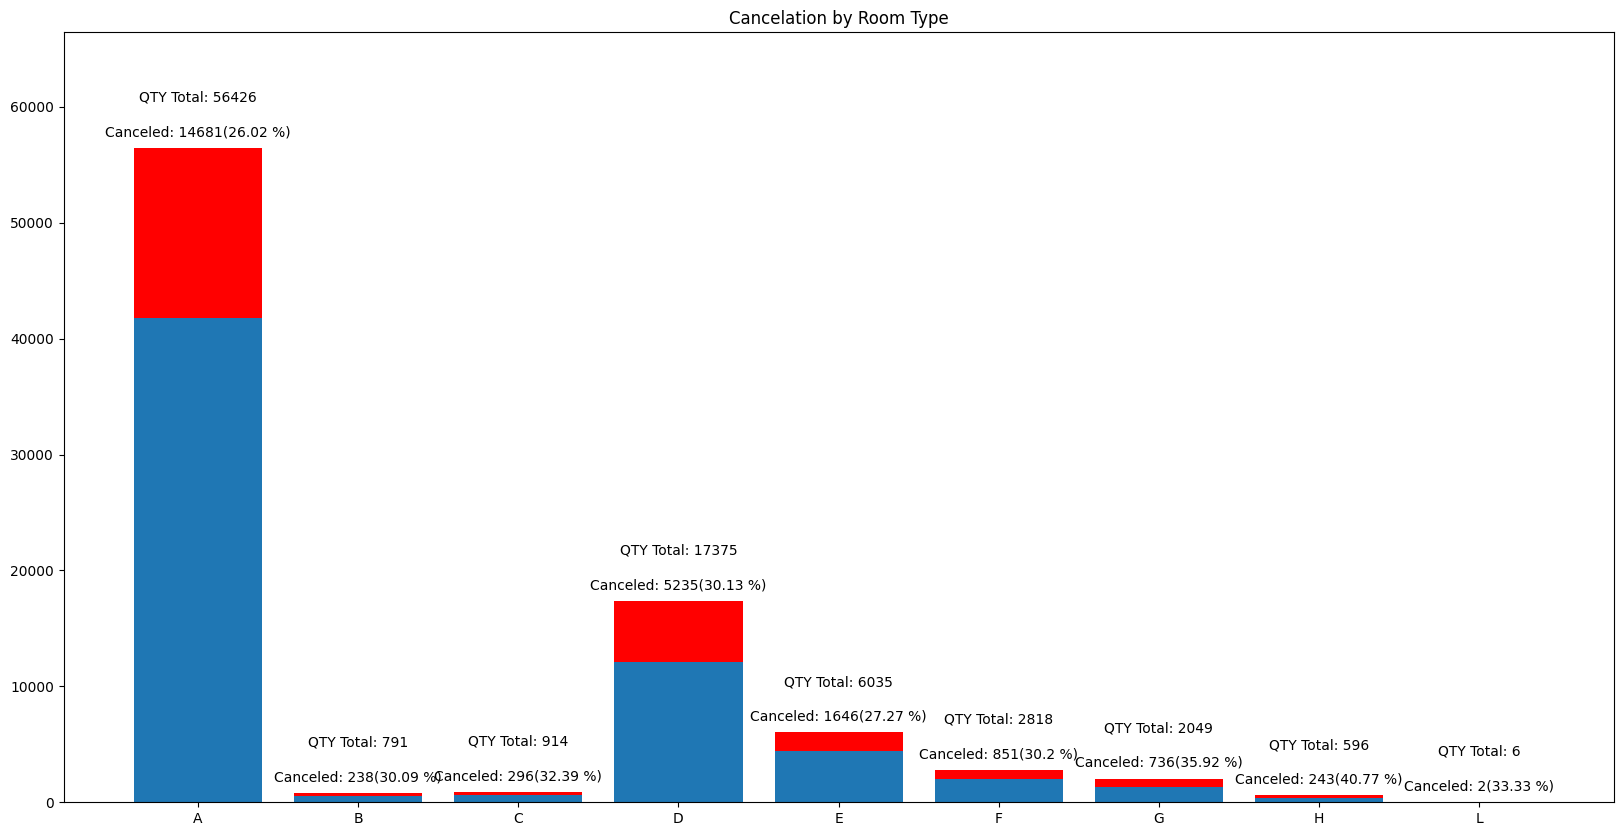

In [ ]:
plot_stacked_bars(df, "reserved_room_type", title="Cancelation by Room Type", fgsize=(20,10))

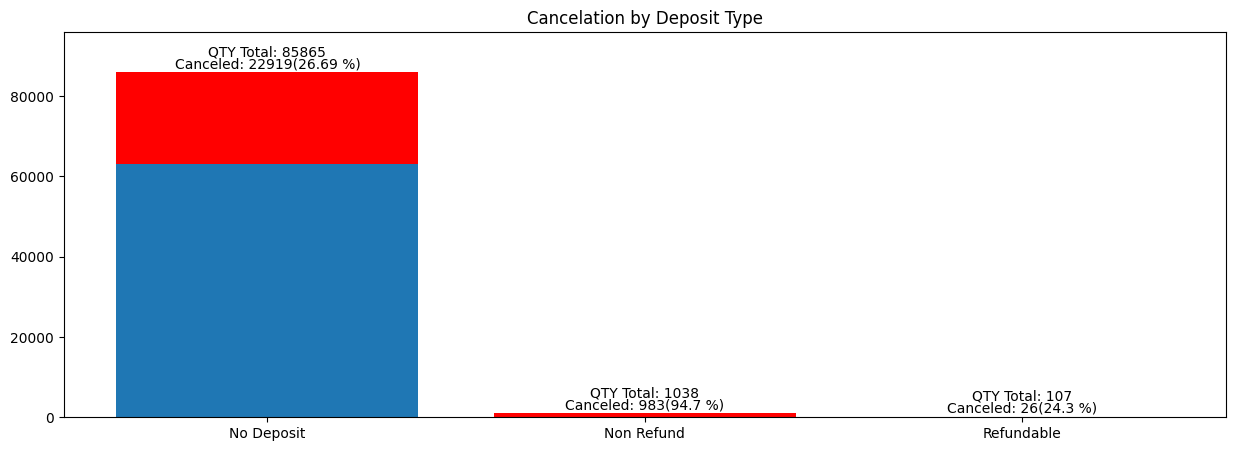

In [ ]:
plot_stacked_bars(df, "deposit_type", title="Cancelation by Deposit Type", fgsize=(15,5))

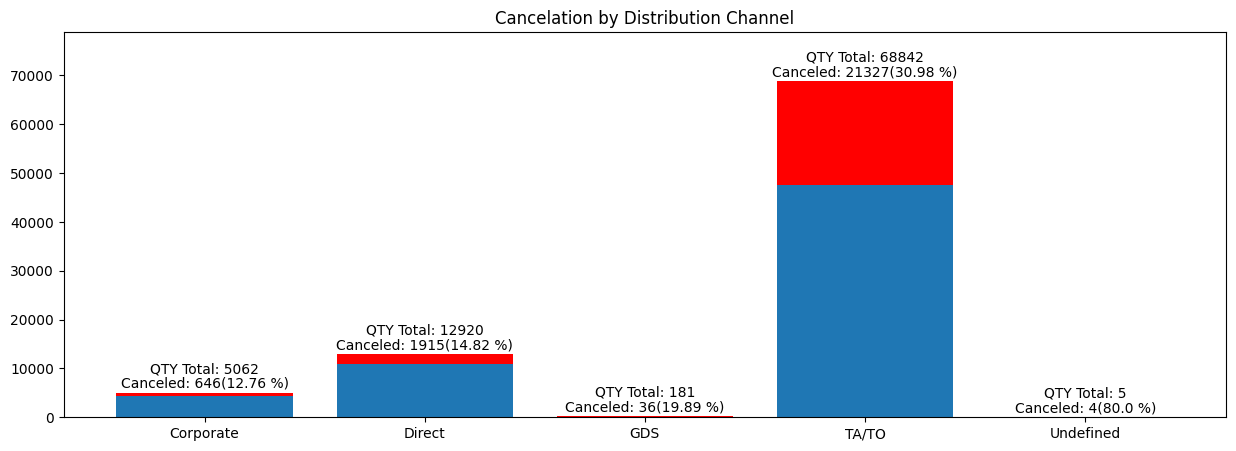

In [ ]:
plot_stacked_bars(df, "distribution_channel", title="Cancelation by Distribution Channel", fgsize=(15,5))

<Axes: xlabel='country', ylabel='total_booking'>

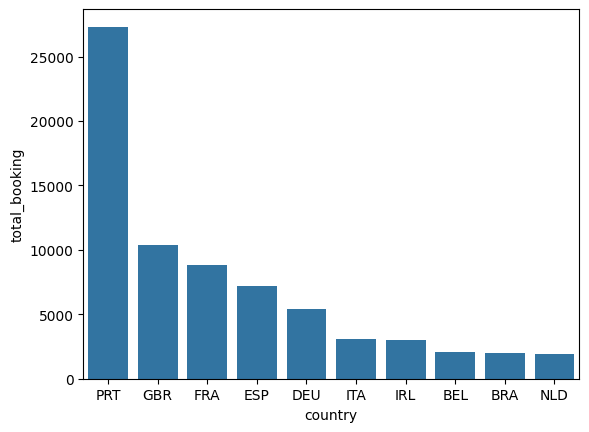

In [ ]:
cscnty = create_grouped_df(df, "country", cols="is_canceled", pround=2)
cscnty = cscnty.sort_values(by="total_booking", ascending=False).head(10)

sns.barplot(cscnty,
            x=cscnty.index, y="total_booking")

> We can see that there are some countries that very hight numbers of bookings compared from others, like 'PRT', 'GBR', 'FRA', 'ESP', 'DEU'. These top 5 countries is I think the most interesting countries to study.

In [ ]:
def plot_dist(df, x, y, max_y, min_y, figsize, suptitle):
    f, (x1, x2) = plt.subplots(1,2, figsize=figsize)

    sns.boxplot(df, x=x, y=y, ax=x1)
    sns.boxplot(df, x=x, y=y, ax=x2)
    x1.set_ylim(min_y, None)
    x2.set_ylim(min_y, max_y)

    x1.set_xticks(x1.get_xticks(), ["not canceled", "canceled"])
    x2.set_xticks(x2.get_xticks(), ["not canceled", "canceled"])
    x1.set_xlabel(None)
    x2.set_xlabel(None)
    x2.set_ylabel(None)

    f.suptitle(suptitle)
    f.tight_layout()
    f.show()

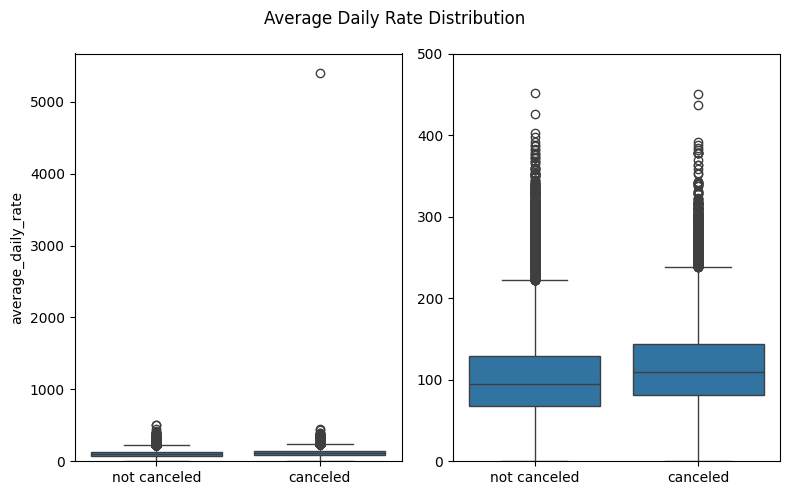

In [ ]:
plot_dist(df, x="is_canceled", y="average_daily_rate",
          min_y=0, max_y=500,
          figsize=(8,5), suptitle="Average Daily Rate Distribution")

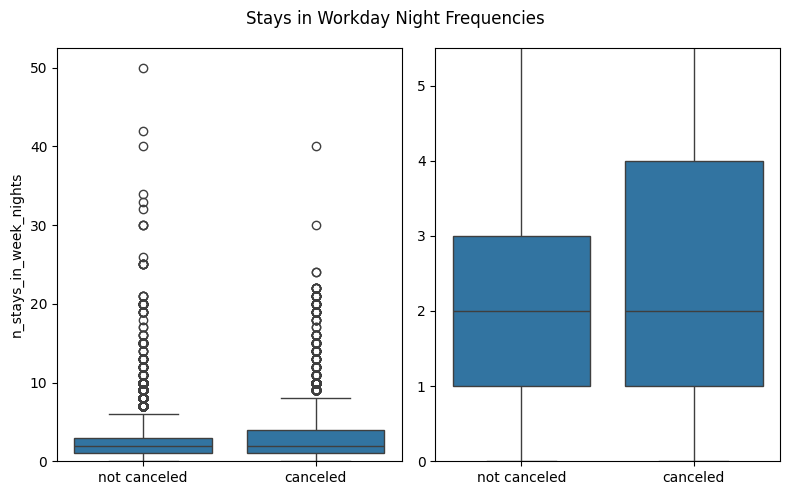

In [ ]:
plot_dist(df, x="is_canceled", y="n_stays_in_week_nights",
          min_y=0, max_y=5.5,
          figsize=(8,5), suptitle="Stays in Workday Night Frequencies")

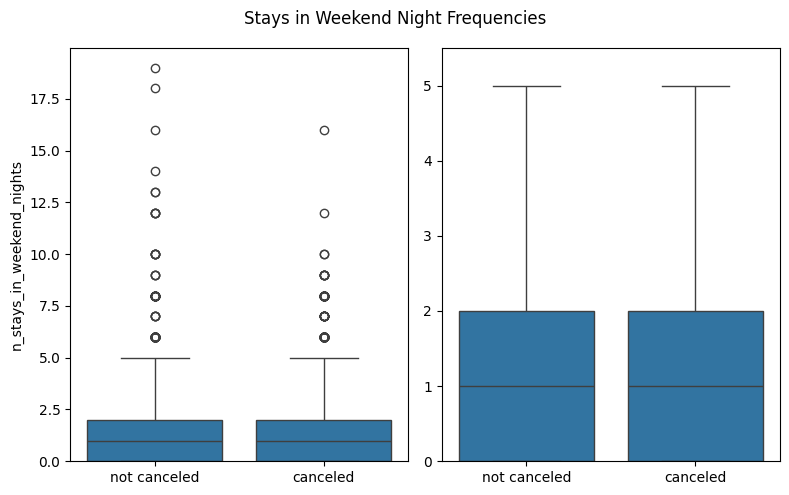

In [ ]:
plot_dist(df, x="is_canceled", y="n_stays_in_weekend_nights",
          min_y=0, max_y=5.5,
          figsize=(8,5), suptitle="Stays in Weekend Night Frequencies")

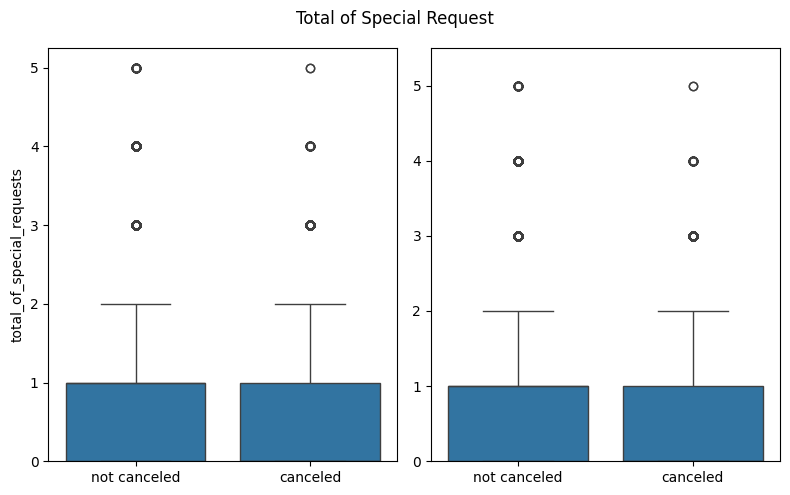

In [ ]:
plot_dist(df, x="is_canceled", y="total_of_special_requests",
          min_y=0, max_y=5.5,
          figsize=(8,5), suptitle="Total of Special Request")

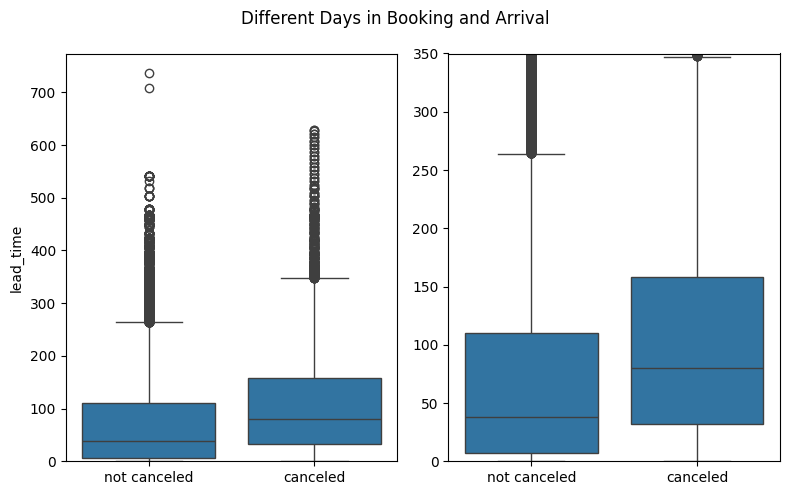

In [ ]:
plot_dist(df, x="is_canceled", y="lead_time",
          min_y=0, max_y=350,
          figsize=(8,5), suptitle="Different Days in Booking and Arrival")

In [ ]:
def plot_percent_canceled(df, groupby, cols, min_points=None, pround=2, lowess=True, return_df = False):

    df = create_grouped_df(df, groupby=groupby, cols=cols, pround=pround).reset_index()

    if min_points != None:
        df = df[df["total_booking"]>=min_points]

    if return_df: return df

    sns.regplot(df, x=groupby, y="percent_canceled", lowess=lowess)

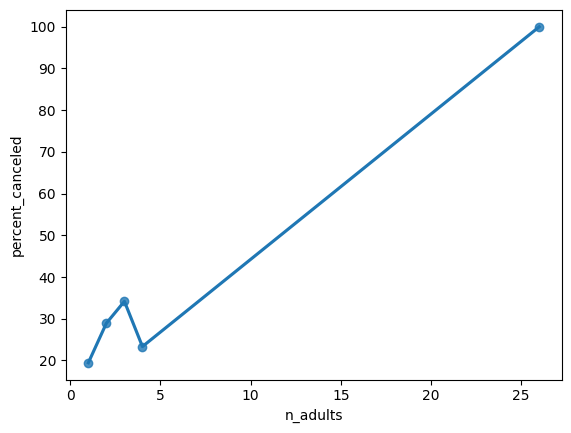

In [ ]:
plot_percent_canceled(df, groupby="n_adults", cols="is_canceled", min_points=5)

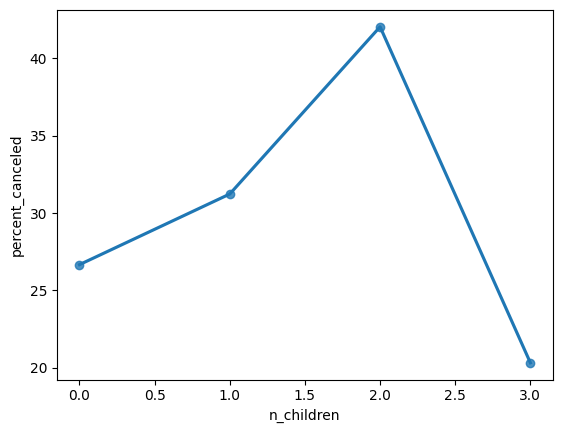

In [ ]:
plot_percent_canceled(df, groupby="n_children", cols="is_canceled", min_points=5)

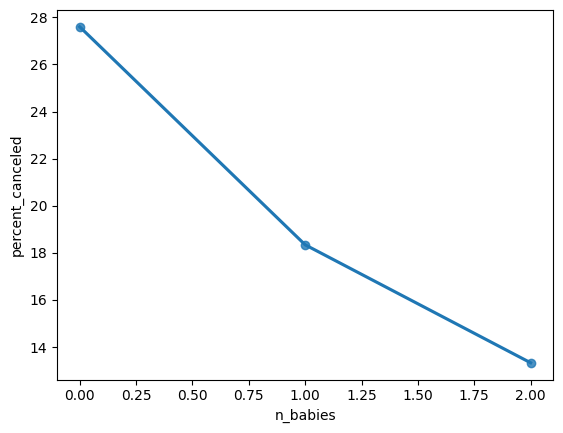

In [ ]:
plot_percent_canceled(df, groupby="n_babies", cols="is_canceled", min_points=5)

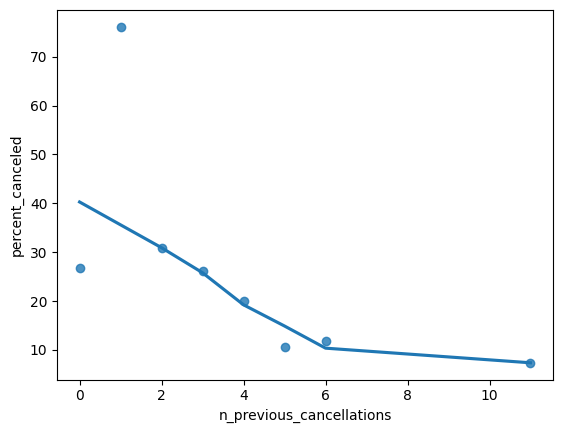

In [ ]:
plot_percent_canceled(df, groupby="n_previous_cancellations", cols="is_canceled", min_points=5)

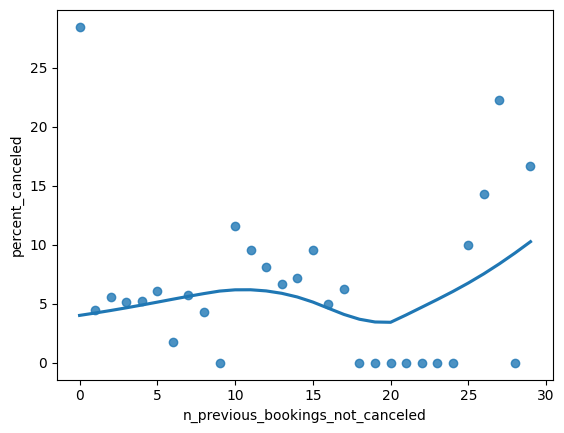

In [ ]:
plot_percent_canceled(df, groupby="n_previous_bookings_not_canceled", cols="is_canceled", min_points=5)

In [ ]:
df.distribution_channel.value_counts()

distribution_channel
TA/TO        68842
Direct       12920
Corporate     5062
GDS            181
Undefined        5
Name: count, dtype: int64

# 6. Data Preprocessing After Exploration

## 6.1 Remove Undefined Market Segment

In [ ]:
df.market_segment.value_counts()

market_segment
Online TA        51370
Offline TA/TO    13852
Direct           11751
Groups            4921
Corporate         4200
Complementary      688
Aviation           226
Undefined            2
Name: count, dtype: int64

In [ ]:
df.drop(df[df.market_segment == 'Undefined'].index, inplace=True)

In [ ]:
df.market_segment.value_counts()

market_segment
Online TA        51370
Offline TA/TO    13852
Direct           11751
Groups            4921
Corporate         4200
Complementary      688
Aviation           226
Name: count, dtype: int64

## 6.2 Remove Undefined Reserved Room Type

In [ ]:
df.reserved_room_type.value_counts()

reserved_room_type
A    56426
D    17375
E     6035
F     2818
G     2049
C      914
B      789
H      596
L        6
Name: count, dtype: int64

In [ ]:
df.drop(df[df.reserved_room_type == 'L'].index, inplace=True)

In [ ]:
df.reserved_room_type.value_counts()

reserved_room_type
A    56426
D    17375
E     6035
F     2818
G     2049
C      914
B      789
H      596
Name: count, dtype: int64

## 6.4 Remove Undefined Distribution Channel

In [ ]:
df.distribution_channel.value_counts()

distribution_channel
TA/TO        68842
Direct       12914
Corporate     5062
GDS            181
Undefined        3
Name: count, dtype: int64

In [ ]:
df.drop(df[df.distribution_channel == 'Undefined'].index, inplace=True)

In [ ]:
df.distribution_channel.value_counts()

distribution_channel
TA/TO        68842
Direct       12914
Corporate     5062
GDS            181
Name: count, dtype: int64

# 7. Data Preprocessing

## 7.1 Feature Encoding

In [ ]:
df_exp = expand_date(df, 'arrival_date', columns_returned='Quarter')

In [ ]:
df_exp.head()

,hotel_type,reserved_room_type,deposit_type,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_date_month,arrival_date_day_of_month,lead_time,days_in_waiting_list,market_segment,distribution_channel,customer_type,country,n_adults,n_children,n_babies,meal_type,is_repeated_guest,n_previous_cancellations,n_previous_bookings_not_canceled,is_canceled,Quarter
0,Resort Hotel,C,No Deposit,0.00,0,0,3,0,0,2015-07-01,July,1,342,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0,3
1,Resort Hotel,C,No Deposit,0.00,0,0,4,0,0,2015-07-01,July,1,737,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0,3
2,Resort Hotel,A,No Deposit,75.00,0,1,0,0,0,2015-07-01,July,1,7,0,Direct,Direct,Transient,GBR,1,0.00,0,BB,0,0,0,0,3
3,Resort Hotel,A,No Deposit,75.00,0,1,0,0,0,2015-07-01,July,1,13,0,Corporate,Corporate,Transient,GBR,1,0.00,0,BB,0,0,0,0,3
4,Resort Hotel,A,No Deposit,98.00,0,2,0,0,1,2015-07-01,July,1,14,0,Online TA,TA/TO,Transient,GBR,2,0.00,0,BB,0,0,0,0,3


In [ ]:
#shows categorical features
cat_features = df_exp.select_dtypes(include='O').columns
df_catdesc = df_exp[cat_features].describe().T
df_catdesc

,count,unique,top,freq
hotel_type,86999,2,City Hotel,53051
reserved_room_type,86999,8,A,56425
deposit_type,86999,3,No Deposit,85854
arrival_date_month,86999,12,August,11204
arrival_date_day_of_month,86999,31,2,3009
market_segment,86999,7,Online TA,51369
distribution_channel,86999,4,TA/TO,68842
customer_type,86999,4,Transient,71719
country,86999,178,PRT,27301
meal_type,86999,5,BB,67683


encoding will be performed for object dtype only. there are 2 possibilites:
1. encoding for binary category
this step is the easiest, just choose category of interest then code it with 1. since only two categories, another category left is encoded 0.

2. encoding for multiple category
first, we will use number to represent each category. for example, categories are A, B, C, D. we choose A as 1, B as 2, C as 3, and D as 4. of course this strategy is somewhat sounds not familiar but this step is really helpfull in univariate feature selections step. since the algorithm of feature selections only accept numerical values.


### 7.1.1 Encode for Binary Category

In [ ]:
df_catdesc[df_catdesc['unique'] == 2]

,count,unique,top,freq
hotel_type,86999,2,City Hotel,53051
is_repeated_guest,86999,2,0,83637
is_canceled,86999,2,0,63077


#### 1. Hotel Type

In [ ]:
#for hotel type
df_exp.hotel_type.value_counts()

hotel_type
City Hotel      53051
Resort Hotel    33948
Name: count, dtype: int64

In [ ]:
#craeate function to encode binary manually
def encode_binary(df, binary_feature_col, feature_interest, new_col_name, inplace=False):
    df[binary_feature_col] = df[binary_feature_col].apply(lambda x: 1 if x == feature_interest else 0).astype('int8')
    df.rename(columns={binary_feature_col : new_col_name}, inplace=inplace)
    return df

In [ ]:
encode_binary(df_exp, binary_feature_col = 'hotel_type', feature_interest = 'City Hotel',
              new_col_name = 'is_city_hotel', inplace=True)

,is_city_hotel,reserved_room_type,deposit_type,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_date_month,arrival_date_day_of_month,lead_time,days_in_waiting_list,market_segment,distribution_channel,customer_type,country,n_adults,n_children,n_babies,meal_type,is_repeated_guest,n_previous_cancellations,n_previous_bookings_not_canceled,is_canceled,Quarter
0,0,C,No Deposit,0.00,0,0,3,0,0,2015-07-01,July,1,342,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0,3
1,0,C,No Deposit,0.00,0,0,4,0,0,2015-07-01,July,1,737,0,Direct,Direct,Transient,PRT,2,0.00,0,BB,0,0,0,0,3
2,0,A,No Deposit,75.00,0,1,0,0,0,2015-07-01,July,1,7,0,Direct,Direct,Transient,GBR,1,0.00,0,BB,0,0,0,0,3
3,0,A,No Deposit,75.00,0,1,0,0,0,2015-07-01,July,1,13,0,Corporate,Corporate,Transient,GBR,1,0.00,0,BB,0,0,0,0,3
4,0,A,No Deposit,98.00,0,2,0,0,1,2015-07-01,July,1,14,0,Online TA,TA/TO,Transient,GBR,2,0.00,0,BB,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,1,A,No Deposit,96.14,2,5,0,0,0,2017-08-30,August,30,23,0,Offline TA/TO,TA/TO,Transient,BEL,2,0.00,0,BB,0,0,0,0,3
87392,1,E,No Deposit,225.43,2,5,0,0,2,2017-08-31,August,31,102,0,Online TA,TA/TO,Transient,FRA,3,0.00,0,BB,0,0,0,0,3
87393,1,D,No Deposit,157.71,2,5,0,0,4,2017-08-31,August,31,34,0,Online TA,TA/TO,Transient,DEU,2,0.00,0,BB,0,0,0,0,3
87394,1,A,No Deposit,104.40,2,5,0,0,0,2017-08-31,August,31,109,0,Online TA,TA/TO,Transient,GBR,2,0.00,0,BB,0,0,0,0,3


In [ ]:
df_exp.is_city_hotel.value_counts()

is_city_hotel
1    53051
0    33948
Name: count, dtype: int64

#### 2. is_repeated_guest and is_canceled

In [ ]:
df_exp['is_repeated_guest'] = df_exp['is_repeated_guest'].astype('int8')
df_exp['is_canceled'] = df_exp['is_canceled'].astype('int8')

### 7.1.2 Encode for Multiple Category

In [ ]:
df_catdesc[df_catdesc['unique'] > 2]

,count,unique,top,freq
reserved_room_type,86999,8,A,56425
deposit_type,86999,3,No Deposit,85854
arrival_date_month,86999,12,August,11204
arrival_date_day_of_month,86999,31,2,3009
market_segment,86999,7,Online TA,51369
distribution_channel,86999,4,TA/TO,68842
customer_type,86999,4,Transient,71719
country,86999,178,PRT,27301
meal_type,86999,5,BB,67683
Quarter,86999,4,3,27881


In [ ]:
df_exp.distribution_channel.value_counts()

distribution_channel
TA/TO        68842
Direct       12914
Corporate     5062
GDS            181
Name: count, dtype: int64

In [ ]:
room_type_encoder = LabelEncoder().fit(df_exp['reserved_room_type'])
deposit_type_encoder = LabelEncoder().fit(df_exp['deposit_type'])
arrival_date_month_encoder = LabelEncoder().fit(df_exp['arrival_date_month'])
arrival_date_day_of_month_encoder = LabelEncoder().fit(df_exp['arrival_date_day_of_month'])
market_segment_encoder = LabelEncoder().fit(df_exp['market_segment'])
distribution_channel_encoder = LabelEncoder().fit(df_exp['distribution_channel'])
customer_type_encoder = LabelEncoder().fit(df_exp['customer_type'])
country_encoder = LabelEncoder().fit(df_exp['country'])
meal_type_encoder = LabelEncoder().fit(df_exp['meal_type'])
Quarter_encoder = LabelEncoder().fit(df_exp['Quarter'])

In [ ]:
df_exp['reserved_room_type'] = room_type_encoder.transform(df_exp['reserved_room_type']).astype('int8')
df_exp['deposit_type'] = deposit_type_encoder.transform(df_exp['deposit_type']).astype('int8')
df_exp['arrival_date_month'] = arrival_date_month_encoder.transform(df_exp['arrival_date_month']).astype('int8')
df_exp['arrival_date_day_of_month'] = arrival_date_day_of_month_encoder.transform(df_exp['arrival_date_day_of_month']).astype('int8')
df_exp['market_segment'] = market_segment_encoder.transform(df_exp['market_segment']).astype('int8')
df_exp['distribution_channel'] = distribution_channel_encoder.transform(df_exp['distribution_channel']).astype('int8')
df_exp['customer_type'] = customer_type_encoder.transform(df_exp['customer_type']).astype('int8')
df_exp['country'] = country_encoder.transform(df_exp['country']).astype('int16')
df_exp['meal_type'] = meal_type_encoder.transform(df_exp['meal_type']).astype('int8')
df_exp['Quarter'] = Quarter_encoder.transform(df_exp['Quarter']).astype('int8')

In [ ]:
df_exp.drop(columns = 'arrival_date', inplace=True)

In [ ]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86999 entries, 0 to 87395
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   is_city_hotel                     86999 non-null  int8   
 1   reserved_room_type                86999 non-null  int8   
 2   deposit_type                      86999 non-null  int8   
 3   average_daily_rate                86999 non-null  float64
 4   n_stays_in_weekend_nights         86999 non-null  int64  
 5   n_stays_in_week_nights            86999 non-null  int64  
 6   n_booking_changes                 86999 non-null  int64  
 7   required_car_parking_spaces       86999 non-null  int64  
 8   total_of_special_requests         86999 non-null  int64  
 9   arrival_date_month                86999 non-null  int8   
 10  arrival_date_day_of_month         86999 non-null  int8   
 11  lead_time                         86999 non-null  int64  
 12  days_in_w

## 7.2 Feature Selection and Cardinality Reduction

In [ ]:
cat_cols = list(df_exp.select_dtypes(include=['int8','int16']).columns)
cat_cols.remove('is_canceled')
num_cols = list(df_exp.select_dtypes(exclude='int8').columns)

In [ ]:
def feature_importance(df, var_cols=cat_cols, return_df=False, method='chi2'):
  #create dataframe of
  df_cf = df_exp[var_cols]
  y = df_exp['is_canceled']

  if method == 'chi2':
    score_vals, p_vals = chi2(df_cf, y)
  elif method == 'f_classif':
    score_vals, p_vals = f_classif(df_cf, y)

  res_df = pd.DataFrame({'features':var_cols,
                          'score_vals': score_vals,
                          'p_vals': p_vals}).sort_values(by='score_vals', ascending=False)

  f, (x1,x2) = plt.subplots(2,1, figsize=(16, 8), sharex=True)
  x1.bar(res_df.features, res_df.score_vals)
  x2.bar(res_df.features, res_df.p_vals)

  plt.suptitle(f"{method} Analysis - Univariate Feature Selection")
  x1.set_ylabel(f"Score {method} value")
  x2.set_ylabel("p-value")
  x2.axhline(0.05, linewidth=1, color='r', linestyle='--')
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

  if return_df:
    return res_df

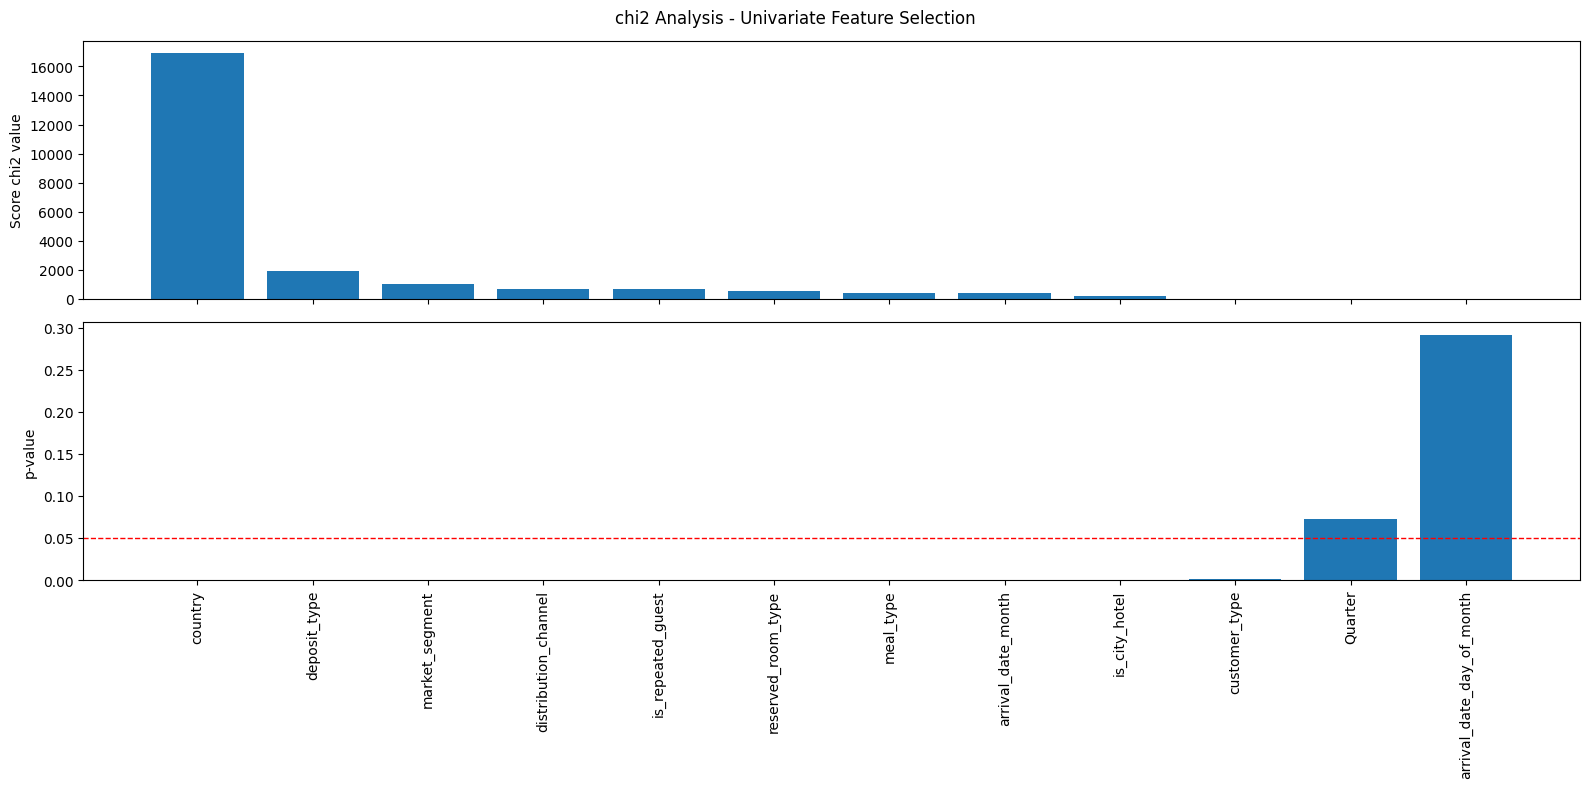

In [ ]:
feature_importance(df_exp, var_cols=cat_cols)

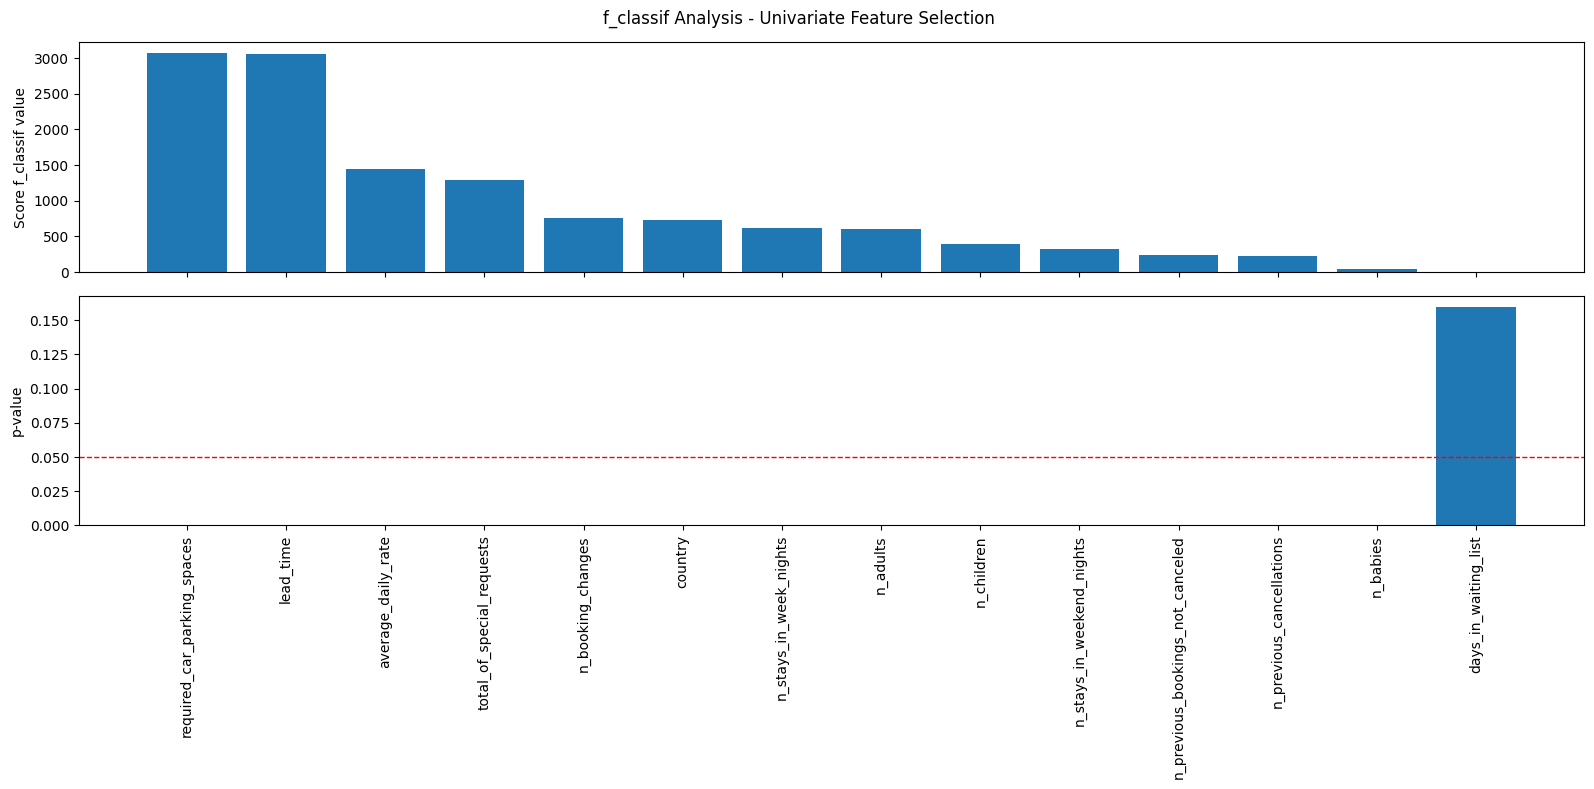

In [ ]:
feature_importance(df_exp, var_cols=num_cols, method='f_classif')

In [ ]:
#aggregate country based on percent number of booking cancelled
country_ansys = create_grouped_df(df, groupby='country', cols="is_canceled", pround=2)
country_ansys = country_ansys.sort_values(by='percent_canceled', ascending=False)

#store the rank of country based on booking canceled
#create binary
bins_cat = np.digitize(country_ansys.percent_canceled, bins=np.arange(20, 100, 20), right=True)
#aggregation
country_group = pd.DataFrame({'country': country_ansys.index,
                              'country_bin': bins_cat + 1})
#create new column of country code
country_group = country_group.assign(country_code = country_encoder.transform(country_group.country))

In [ ]:
df_exp = df_exp.merge(country_group, how='left', left_on='country', right_on='country_code')
df_exp['country_bin'] = df_exp['country_bin'].astype('int8')
df_exp.head(3)

,is_city_hotel,reserved_room_type,deposit_type,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,arrival_date_month,arrival_date_day_of_month,lead_time,days_in_waiting_list,market_segment,distribution_channel,customer_type,country_x,n_adults,n_children,n_babies,meal_type,is_repeated_guest,n_previous_cancellations,n_previous_bookings_not_canceled,is_canceled,Quarter,country_y,country_bin,country_code
0,0,2,0,0.00,0,0,3,0,0,5,0,342,0,3,1,2,135,2,0.00,0,0,0,0,0,0,2,PRT,2,135
1,0,2,0,0.00,0,0,4,0,0,5,0,737,0,3,1,2,135,2,0.00,0,0,0,0,0,0,2,PRT,2,135
2,0,0,0,75.00,0,1,0,0,0,5,0,7,0,3,1,2,59,1,0.00,0,0,0,0,0,0,2,GBR,1,59


In [ ]:
df_exp.drop(columns = ['country_code', 'country_x', 'country_y',
                       'Quarter', 'arrival_date_day_of_month',
                       'days_in_waiting_list'], inplace=True)

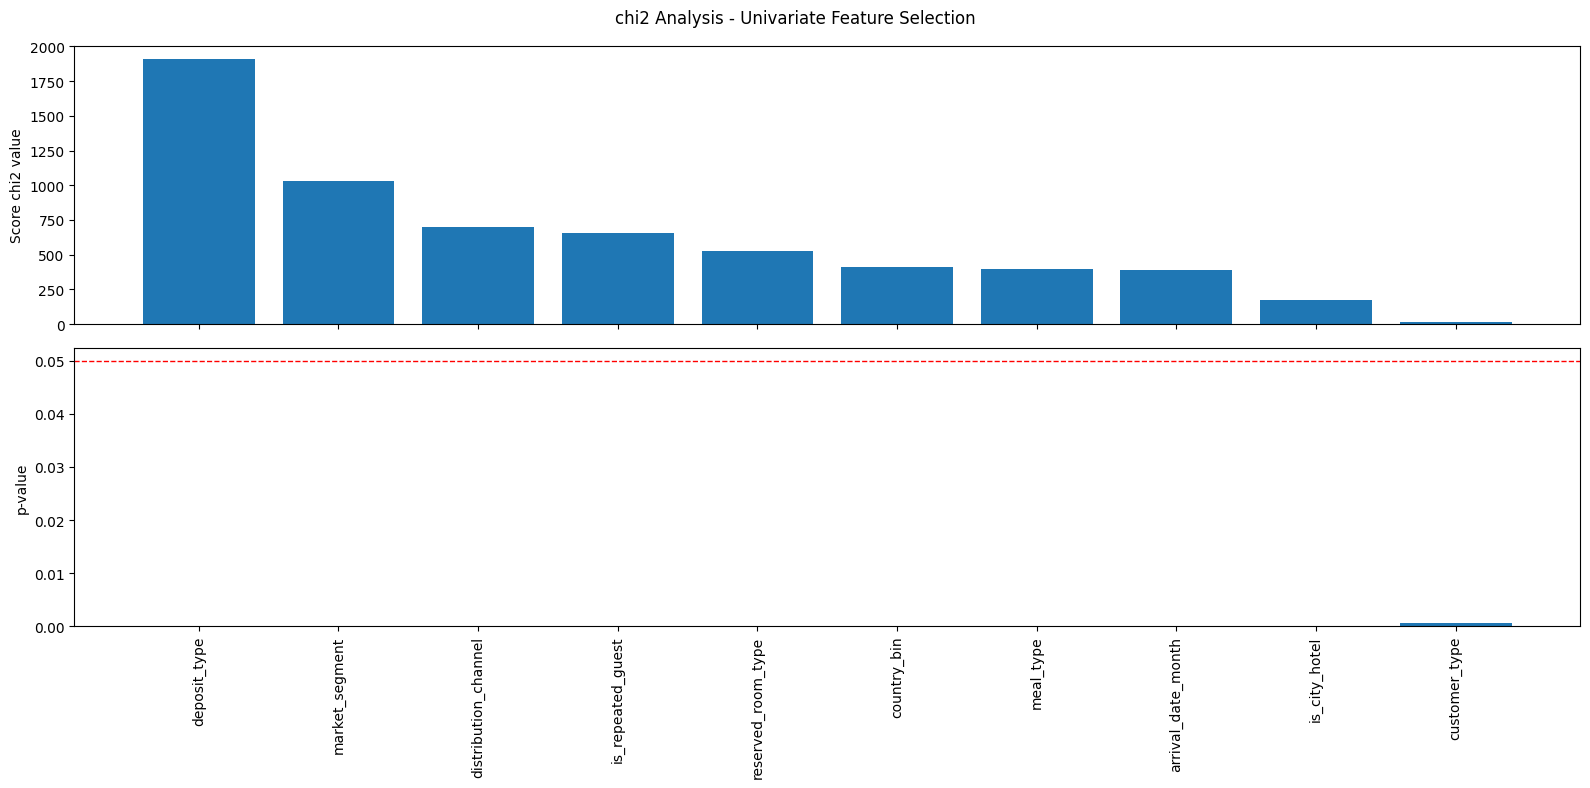

In [ ]:
cat_cols = list(df_exp.select_dtypes(include=['int8','int16']).columns)
cat_cols.remove('is_canceled')
num_cols = list(df_exp.select_dtypes(exclude=['int8','int16']).columns)

feature_importance(df_exp, var_cols=cat_cols)

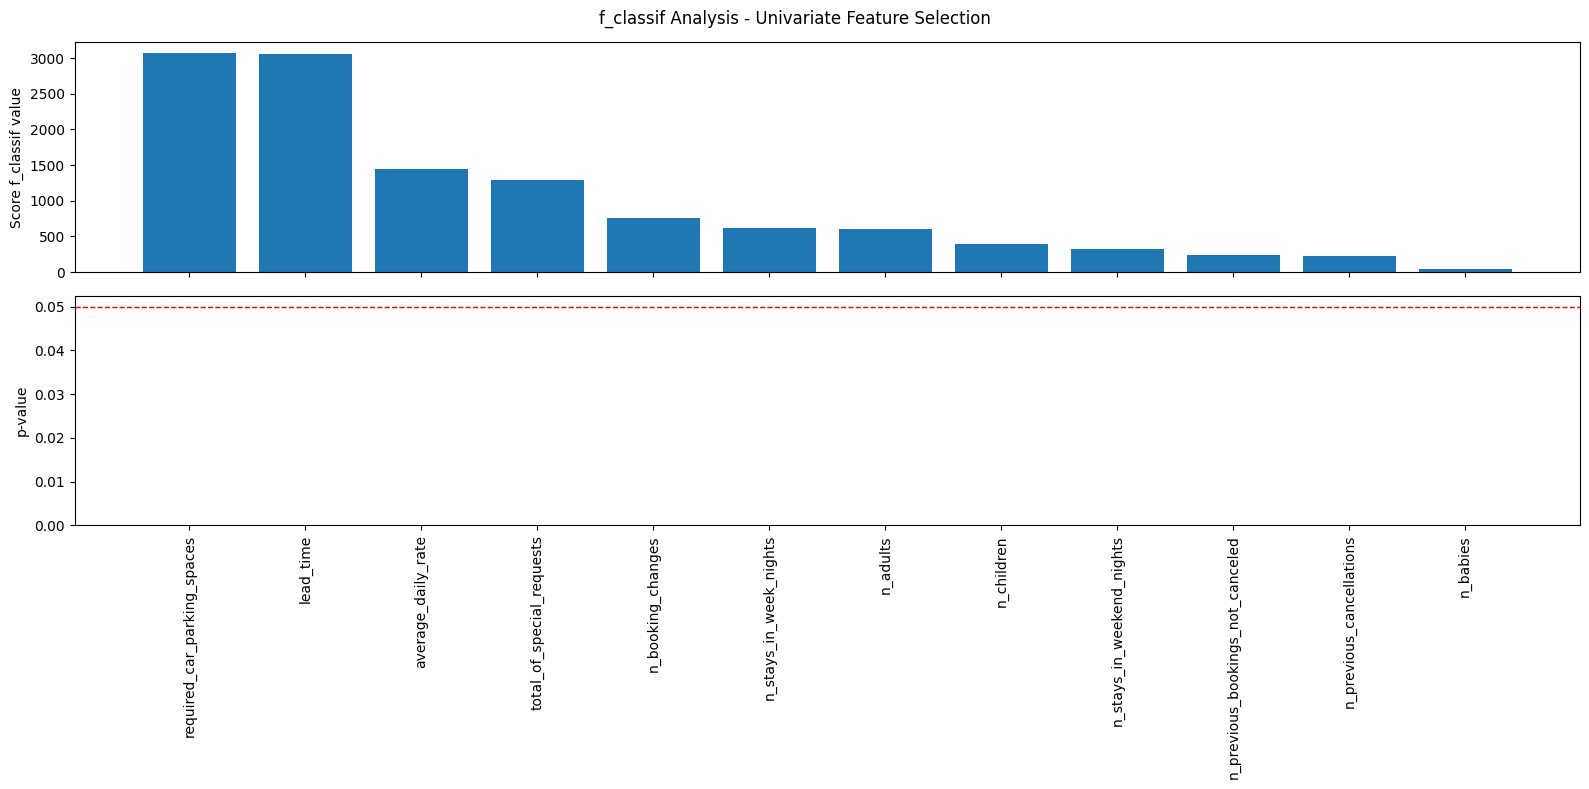

In [ ]:
feature_importance(df_exp, var_cols=num_cols, method='f_classif')

In [ ]:
bin_cols = ['is_city_hotel','is_repeated_guest']
ord_cols = ['arrival_date_month', 'country_bin']
nom_cols = [i for i in cat_cols if i not in bin_cols+ord_cols]

df_exp = df_exp[num_cols+ord_cols+bin_cols+nom_cols+['is_canceled']]
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86999 entries, 0 to 86998
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   average_daily_rate                86999 non-null  float64
 1   n_stays_in_weekend_nights         86999 non-null  int64  
 2   n_stays_in_week_nights            86999 non-null  int64  
 3   n_booking_changes                 86999 non-null  int64  
 4   required_car_parking_spaces       86999 non-null  int64  
 5   total_of_special_requests         86999 non-null  int64  
 6   lead_time                         86999 non-null  int64  
 7   n_adults                          86999 non-null  int64  
 8   n_children                        86999 non-null  float64
 9   n_babies                          86999 non-null  int64  
 10  n_previous_cancellations          86999 non-null  int64  
 11  n_previous_bookings_not_canceled  86999 non-null  int64  
 12  arri

In [ ]:
from sklearn.decomposition import PCA

def create_df(X_np, y_np, column_names=df_exp.columns):
    Xy_np = np.concatenate([X_np, y_np.reshape(-1, 1)], axis=1)
    return pd.DataFrame(Xy_np, columns=column_names)

def perform_2pca(df, column_names=['pca_1', 'pca_2', 'class']):
    pca = PCA(n_components = 2)
    X_np = df.iloc[:,:-1].to_numpy()
    y_np = df.iloc[:,-1].to_numpy()

    X_pca = pca.fit_transform(X_np)

    return create_df(X_pca, y_np, column_names=column_names)

<Axes: xlabel='pca_1', ylabel='pca_2'>

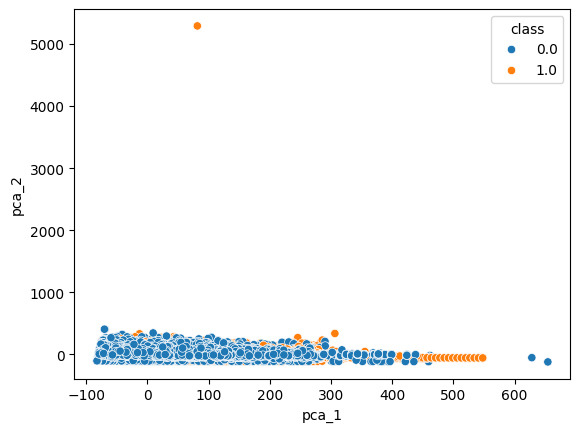

In [ ]:
df_pca = perform_2pca(df_exp)

sns.scatterplot(df_pca, x = 'pca_1', y = 'pca_2', hue = 'class')

## 7.3 Split Training and Testing Dataset

In [ ]:
print(df_exp.is_canceled.value_counts())
print(f'\ncanceled: {100*df_exp.is_canceled.sum()/len(df_exp) :.2f} %')

is_canceled
0    63077
1    23922
Name: count, dtype: int64

canceled: 27.50 %


In [ ]:
# Define the features (X) and the output labels (y)
X = df_exp.drop('is_canceled', axis=1)
y = df_exp['is_canceled']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (69599, 22)
y_train : (69599,)
X_test : (17400, 22)
y_test : (17400,)


## 7.4 Feature Balancinng

In [ ]:
#before resampling
print(f"""
BEFORE RESAMPLING
=====================================
cancel     : {(y_train == 1).sum()}
not cancel : {(y_train == 0).sum()}
=====================================
cancel     : {100*(y_train == 1).sum()/len(y_train):.2f}%
""")


BEFORE RESAMPLING
cancel     : 19138
not cancel : 50461
cancel     : 27.50%



In [ ]:
X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

In [ ]:
#before resampling
print(f"""
AFTER RESAMPLING
=====================================
cancel     : {(y_train == 1).sum()}
not cancel : {(y_train == 0).sum()}
=====================================
cancel     : {100*(y_train == 1).sum()/len(y_train):.2f}%
""")


AFTER RESAMPLING
cancel     : 50461
not cancel : 50461
cancel     : 50.00%



#8. Model Selection

from dataset, we know that:
1. The task is classification
2. Dataset contains 64 columns (relatively high dimensional dataset) and 102.349 rows (synthetics)
3. Dataset contains a lot of outliers (can bee seen from df.info() that data is highly skewed)
4. Dataset contains a lot of categorical columns


so from aformentions dataset characteristics the models has to be:
1. performing classification tasks
2. can handle high dimensional data
3. relatively robust to outliers

the models that maybe suited for this job are:
1. Logistic Regression
2. Tree and Ensembled Tree based models (Decision Tree, Random Forest, XGboost)

and for baseline model, we use Naive Bayes

## 8.1 Getting Ready

### 8.1.1 Create Custom Transformer and Scaler

In [ ]:
def make_dummies(X,
                 dummy_cols = nom_cols):

  X_ = X.copy()
  X_dmy = X_[dummy_cols]
  non_dummy_cols = [col for col in X_.columns if col not in dummy_cols]

  #create dummy dataframe
  X_dmy = pd.get_dummies(X_dmy, columns = dummy_cols)
  return pd.concat([X_[non_dummy_cols], X_dmy], axis=1)

def transform_scaler(X,
                     transcaler_cols = num_cols):

  #create copy data and seperate columns for transformer and scaling from dummy columns
  X_ = X.copy()
  X_tfs = X_[transcaler_cols]
  non_tfs_cols = [col for col in X_.columns if col not in transcaler_cols]

  #transforming columns
  PTF = PowerTransformer()
  X_tfs = PTF.fit_transform(X_tfs)

  #scaling columns
  RSC = RobustScaler()
  X_tfs = RSC.fit_transform(X_tfs)

  X_tfs = np.concatenate([X_tfs, X_[non_tfs_cols].to_numpy('float64')], axis=1)
  return X_tfs

#turn it into sklearn transformer class object
transcaler = FunctionTransformer(transform_scaler, kw_args={'transcaler_cols':num_cols})

### 8.1.2 Refit Strategy

In [ ]:
scoring = ['f1_macro', 'precision', 'recall']

In [ ]:
def print_resulted_model(information_df):
  """Returning Information About GridSearch Result"""
  for mean_test_f1_macro, std_test_f1_macro, mean_test_precision, std_test_precision, mean_test_recall, std_test_recall, params in zip(
      information_df['mean_test_f1_macro'],
      information_df['std_test_f1_macro'],
      information_df['mean_test_precision'],
      information_df['std_test_precision'],
      information_df['mean_test_recall'],
      information_df['std_test_recall'],
      information_df['params']
  ):
  #return the statistic of model
    print(f" {params}:\n"
          f"f1-Macro Score: {mean_test_f1_macro:0.3f} (±{std_test_f1_macro:0.03f}),"
          f" precision: {mean_test_precision:0.3f} (±{std_test_precision:0.03f}),"
          f" recall: {mean_test_precision:0.3f} (±{std_test_precision:0.03f})")
  print()

def refit_strategy(cv_results):
  f1_macro_treshold = 0.9

  cv_results_df = pd.DataFrame(cv_results)

  #print all gridsearch results
  print("All GridSearch Hyperparameter Tuning Test Result:")
  print_resulted_model(cv_results_df)

  #filter-out all results below the threshold
  high_f1_macro_result = cv_results_df[
      cv_results_df['mean_test_f1_macro'] > f1_macro_treshold
  ]

  if len(high_f1_macro_result) == 0:
    print(f"The GridSeach unable to find model with f1-macro Score above {f1_macro_treshold}\n",
          f"Alternative: Search for f1-macro above average")

    #choose model with f1-Macro above average
    avg_f1_macro = cv_results_df['mean_test_f1_macro'].mean()
    high_f1_macro_result = cv_results_df[
        cv_results_df['mean_test_f1_macro'] > avg_f1_macro
    ]

  else:
    print(f"Selected Model Parameter with f1-macro higher than {avg_f1_macro}:")
    print_resulted_model(high_f1_macro_result)

  #filter-out all results with low precision
  std_precision = high_f1_macro_result['mean_test_precision'].std()
  max_precision = high_f1_macro_result['mean_test_precision'].max()
  precision_std_treshold = max_precision - std_precision

  high_f1_macro_high_precision_result = high_f1_macro_result[
      high_f1_macro_result['mean_test_precision'] > precision_std_treshold
  ]
  print("Out of the previously selected high f1 Macro Score models, we keep all the\n"
        "the models within one standard deviation of the highest precision:\n")
  print_resulted_model(high_f1_macro_high_precision_result)

  #select model with the greatest recall
  choosen_model_index = high_f1_macro_high_precision_result[
      "mean_test_recall"
  ].idxmax()

  print("\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on f1-macro score and precision.\n"
        "The resulting model is:\n")

  choosen_model_info = ["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "params",
                        "mean_test_f1_macro", "std_test_f1_macro", "rank_test_f1_macro",
                        "mean_test_precision", "std_test_precision", "rank_test_precision",
                        "mean_test_recall", "std_test_recall", "rank_test_recall"]

  resulted_model = high_f1_macro_high_precision_result.loc[choosen_model_index, choosen_model_info]

  print(resulted_model)

  return choosen_model_index

### 8.1.3 Cross Validation

In [ ]:
SKF = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=0)

### 8.1.3 Model Evaluation Metrics

In [ ]:
def classification_reports(best_model, X_train, X_test, y_train, y_test):
  y_train_pred = best_model.predict(X_train)
  y_test_pred = best_model.predict(X_test)

  print("classification report for train set")
  print(classification_report(y_train, y_train_pred))
  print("\n\n")

  print("classification report for test set")
  print(classification_report(y_test, y_test_pred))
  print("\n\n")

In [ ]:
def create_roc_auc_curve(figsize = (14,8),
                         X_test = X_test,
                         X_test_lin = None,
                         y_test = y_test,
                         **kw_models):

  #list of colours
  c = ['b', 'g', 'r', 'c']
  roc_auc_scores = []

  count = 0
  fig, axes = plt.subplots(1,1, figsize = figsize)
  for model_name, model_grid in kw_models.items():
    if model_name == 'logistic_regression':
      X_test_ = X_test_lin
    else:
      X_test_ = X_test

    #get precision, recall, and treshold for every model
    precision, recall, treshold = precision_recall_curve(y_test, model_grid.predict_proba(X_test_)[:,1])
    roc_auc_scores.append(roc_auc_score(y_test, model_grid.predict_proba(X_test_)[:,1]))

    #get close zero index
    close_zero = np.argmin(np.abs(treshold - 0.5))

    #plot precision vs recall
    axes.plot(precision, recall, label=str(model_name), linestyle="solid", c=c[count])

    #plot poin of close zero
    axes.plot(precision[close_zero], recall[close_zero], "o", markersize=10,
                    label="Probability Treshold 0.5 ["+str(model_name)+"]", fillstyle="none", c=c[count], mew=2)

    count += 1

  plt.suptitle(f"ROC Curve for Class Positive Class")
  plt.xlabel("Precision")
  plt.ylabel("Recall")
  plt.legend(bbox_to_anchor = (1.01, .5), loc="center left")
  plt.tight_layout()
  plt.show()

  for auc_index, model_name in enumerate(kw_models.keys()):
    print(f"ROC AUC Score for {model_name}:  {roc_auc_scores[auc_index]*100 :.2f}%")

## 8.2 Model Generation

In [ ]:
X_train_dummies = make_dummies(X_train, dummy_cols=nom_cols)
X_train_dummies.head(3)

,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,lead_time,n_adults,n_children,n_babies,n_previous_cancellations,n_previous_bookings_not_canceled,arrival_date_month,country_bin,is_city_hotel,is_repeated_guest,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,...,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,customer_type_0,customer_type_1,customer_type_2,customer_type_3,meal_type_0,meal_type_1,meal_type_2,meal_type_3,meal_type_4
0,80.75,1,3,0,0,1,196,2,0.00,0,0,0,8,1,1,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False
1,58.00,0,1,0,0,0,4,1,1.00,0,0,5,7,2,0,1,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
2,110.00,1,1,1,0,0,118,1,0.00,0,0,0,6,2,1,0,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False


In [ ]:
X_test_dummies = make_dummies(X_test, dummy_cols=nom_cols)
X_test_dummies.head(3)

,average_daily_rate,n_stays_in_weekend_nights,n_stays_in_week_nights,n_booking_changes,required_car_parking_spaces,total_of_special_requests,lead_time,n_adults,n_children,n_babies,n_previous_cancellations,n_previous_bookings_not_canceled,arrival_date_month,country_bin,is_city_hotel,is_repeated_guest,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,...,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,customer_type_0,customer_type_1,customer_type_2,customer_type_3,meal_type_0,meal_type_1,meal_type_2,meal_type_3,meal_type_4
29134,49.00,0,4,2,1,0,152,1,0.00,0,0,0,0,1,0,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
54282,65.00,2,0,0,0,0,2,1,0.00,0,0,7,5,2,1,1,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
57787,93.50,0,4,0,0,1,8,2,0.00,0,0,0,3,2,1,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False


### 8.2.1 Baseline Model - Naive Bayes

In [ ]:
pGaussianNB = Pipeline([('tfs', transcaler), ('GNB', GaussianNB())])

pGaussianNB.fit(X_train_dummies, y_train)
classification_reports(pGaussianNB, X_train_dummies, X_test_dummies, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.82      0.33      0.47     50461
           1       0.58      0.93      0.71     50461

    accuracy                           0.63    100922
   macro avg       0.70      0.63      0.59    100922
weighted avg       0.70      0.63      0.59    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.93      0.32      0.47     12616
           1       0.34      0.93      0.50      4784

    accuracy                           0.49     17400
   macro avg       0.63      0.63      0.49     17400
weighted avg       0.77      0.49      0.48     17400






The score of Naive Bayes Model is so low, and it is acually has 49% accuracy, meaning that Naive Bayes Model is unable to predict at all. Because we just have training dataset of 50% positive class, so accuracy near 50% is the same as probability of choosing one class only.

### 8.2.2 Linear Model - Logistic Regression

In [ ]:
#Logistic Regression Class
logreg = LogisticRegression(random_state=0,
                            solver='saga',
                            max_iter=100,
                            tol=1e-3,
                            n_jobs=-1)

#Create Pipeline of Logistic Regression
pLogreg = Pipeline([('tfs', transcaler), ('logreg', logreg)])

#Logistic Regression Hyperparameters
logreg_hp = [{'logreg__penalty' : ['elasticnet'],
              'logreg__C' : [1e-2, 1e-1, 1, 1e+1, 1e+2],
              'logreg__l1_ratio' : [.1, .5, .9]},
             {'logreg__penalty' : ['l2', 'l1'],
              'logreg__C' : [1e-2, 1e-1, 1, 1e+1, 1e+2]}]

In [ ]:
#Define GridSearch
logreg_grid = GridSearchCV(pLogreg,
                           param_grid = logreg_hp,
                           scoring = scoring,
                           refit = refit_strategy,
                           cv = SKF,
                           n_jobs = -1)

#Fit Models
logreg_grid.fit(X_train_dummies, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.746 (±0.002), precision: 0.739 (±0.002), recall: 0.739 (±0.002)
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.746 (±0.002), precision: 0.739 (±0.002), recall: 0.739 (±0.002)
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.9, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.745 (±0.002), precision: 0.738 (±0.002), recall: 0.738 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.746 (±0.002), precision: 0.740 (±0.002), recall: 0.740 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.746 (±0.002), precision: 0.740 (±0.002), recall: 0.740 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.9, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.746 (±0.002), precision: 0.740 (±0.002), reca

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('tfs',
                                        FunctionTransformer(func=<function transform_scaler at 0x789768f253f0>,
                                                            kw_args={'transcaler_cols': ['average_daily_rate',
                                                                                         'n_stays_in_weekend_nights',
                                                                                         'n_stays_in_week_nights',
                                                                                         'n_booking_changes',
                                                                                         'required_car_parking_spaces',
                                                                                         'total_of_special_request...
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=0,
                                                           solver='saga',
                                                           tol=0.001))]),
             n_jobs=-1,
             param_grid=[{'logreg__C': [0.01, 0.1, 1, 10.0, 100.0],
                          'logreg__l1_ratio': [0.1, 0.5, 0.9],
                          'logreg__penalty': ['elasticnet']},
                         {'logreg__C': [0.01, 0.1, 1, 10.0, 100.0],
                          'logreg__penalty': ['l2', 'l1']}],
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(logreg_grid, X_train_dummies, X_test_dummies, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     50461
           1       0.74      0.76      0.75     50461

    accuracy                           0.75    100922
   macro avg       0.75      0.75      0.75    100922
weighted avg       0.75      0.75      0.75    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     12616
           1       0.51      0.78      0.62      4784

    accuracy                           0.73     17400
   macro avg       0.70      0.75      0.71     17400
weighted avg       0.79      0.73      0.75     17400






In [ ]:
logreg_grid.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l1'}

for logistic regression it seems to be better at predicting results on testing dataset (accuracy is 73%) than naive bayes model.

but the precision on positive class within testing dataset is still low with high recall. this fenomenon might be caused by the biases in positive class, the model is trying so much to label prediction as positive class but accually it is negative class. in addition, it seems that the model is underfitting, since the accuracy score on training and testing dataset is close.

### 8.2.3 Tree Based Model - Decision Tree

In [ ]:
#Decision Tree Hyperparameters
DTC_hp = {'max_depth' : [5, 10, 20],
          'max_leaf_nodes' : [10, 15, 20, 25],
          'criterion' : ['gini', 'entropy'],
          'class_weight' : [{0: 1, 1: w} for w in [1, 3, 5]]}

In [ ]:
#Decision Tree
DTC = DecisionTreeClassifier(random_state=0)

#Define GridSearch
DTC_grid = GridSearchCV(DTC,
                        param_grid = DTC_hp,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = SKF,
                        n_jobs = -1)

#Fit Models
DTC_grid.fit(X_train, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}:
f1-Macro Score: 0.720 (±0.004), precision: 0.689 (±0.004), recall: 0.689 (±0.004)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 15}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 20}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 25}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10}:
f1-Macro Score: 0.725 (±0.005), precision: 0.752 (±0.008), recall: 0.752 (±0.008)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 10, 'max_leaf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_leaf_nodes': [10, 15, 20, 25]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(DTC_grid, X_train, X_test, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     50461
           1       0.71      0.79      0.75     50461

    accuracy                           0.74    100922
   macro avg       0.74      0.74      0.74    100922
weighted avg       0.74      0.74      0.74    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     12616
           1       0.49      0.80      0.61      4784

    accuracy                           0.72     17400
   macro avg       0.70      0.74      0.69     17400
weighted avg       0.79      0.72      0.73     17400






In [ ]:
DTC_grid.best_params_

{'class_weight': {0: 1, 1: 1},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 15}

for Decision Tree, it seems to be better at predicting results on testing dataset (accuracy is 73%) than naive bayes model. But the score is not different from logistic regression model.

also, the precision on positive class within testing dataset is still low with high recall. this fenomenon might be caused by the biases in positive class, the model is trying so much to label prediction as positive class but accually it is negative class. in addition, it seems that the model is underfitting, since the accuracy score on training and testing dataset is close.

### 8.2.4 Tree Based Model - Random Forest

In [ ]:
RFC_hp = {'n_estimators': [50, 100],
          'max_depth': [5, 10, 15, 20],
          'class_weight': [{0: 1, 1: w} for w in [1, 3, 5]]}

In [ ]:
#Random Forest
RFC = RandomForestClassifier(random_state=0, n_jobs=-1)

#Define GridSearch
RFC_grid = GridSearchCV(RFC,
                        param_grid = RFC_hp,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = SKF,
                        n_jobs = -1)

#Fit Models
RFC_grid.fit(X_train, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'n_estimators': 50}:
f1-Macro Score: 0.743 (±0.004), precision: 0.714 (±0.009), recall: 0.714 (±0.009)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'n_estimators': 100}:
f1-Macro Score: 0.738 (±0.004), precision: 0.704 (±0.005), recall: 0.704 (±0.005)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 10, 'n_estimators': 50}:
f1-Macro Score: 0.769 (±0.002), precision: 0.747 (±0.005), recall: 0.747 (±0.005)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 10, 'n_estimators': 100}:
f1-Macro Score: 0.770 (±0.003), precision: 0.747 (±0.003), recall: 0.747 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 15, 'n_estimators': 50}:
f1-Macro Score: 0.804 (±0.002), precision: 0.775 (±0.001), recall: 0.775 (±0.001)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 15, 'n_estimators': 100}:
f1-Macro Score: 0.805 (±0.002), precision: 0.777 (±0.002), recall: 0.777 (±0.002)
 {'class_weight': {0: 1, 1: 1}, 'max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(RFC_grid, X_train, X_test, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     50461
           1       0.87      0.96      0.91     50461

    accuracy                           0.90    100922
   macro avg       0.91      0.90      0.90    100922
weighted avg       0.91      0.90      0.90    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     12616
           1       0.60      0.77      0.67      4784

    accuracy                           0.79     17400
   macro avg       0.75      0.79      0.76     17400
weighted avg       0.82      0.79      0.80     17400






In [ ]:
RFC_grid.best_params_

{'class_weight': {0: 1, 1: 1}, 'max_depth': 20, 'n_estimators': 100}

for Random Forest, it seems to be better at predicting results on testing dataset (accuracy is 79%) than any previous models.

But, the precision on positive class within testing dataset is still low with high recall. this fenomenon might be caused by the biases in positive class, the model is trying so much to label prediction as positive class but accually it is negative class.

from a relatively big gap of accuracy in training and testing dataset, seems that there is high probability that Random Forest model is overfitting.

### 8.2.5 Tree Based Model - XGboost

In [ ]:
XGB_hp = {'max_depth': [5, 7],
          'subsample' : [0.5, 0.8],
          'colsample_bytree' : [0.7, 0.8],
          'gamma': [1e-5, 1e-3, 1, 1e+3, 1e+5]}

In [ ]:
#XGboost
XGB = XGBClassifier(random_state=0, n_jobs=-1)

#Define GridSearch
XGB_grid = GridSearchCV(XGB,
                        param_grid = XGB_hp,
                        scoring = scoring,
                        refit = refit_strategy,
                        cv = SKF,
                        n_jobs = -1)

#Fit Models
XGB_grid.fit(X_train, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 5, 'subsample': 0.5}:
f1-Macro Score: 0.787 (±0.003), precision: 0.771 (±0.003), recall: 0.771 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 5, 'subsample': 0.8}:
f1-Macro Score: 0.789 (±0.002), precision: 0.773 (±0.003), recall: 0.773 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 7, 'subsample': 0.5}:
f1-Macro Score: 0.808 (±0.000), precision: 0.789 (±0.002), recall: 0.789 (±0.002)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 7, 'subsample': 0.8}:
f1-Macro Score: 0.812 (±0.003), precision: 0.792 (±0.003), recall: 0.792 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 0.001, 'max_depth': 5, 'subsample': 0.5}:
f1-Macro Score: 0.787 (±0.003), precision: 0.771 (±0.003), recall: 0.771 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 0.001, 'max_depth': 5, 'subsample': 0.8}:
f1-Macro Score: 0.789 (±0.002), precision: 0.773 (±0.003), recall: 0.773

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'gamma': [1e-05, 0.001, 1, 1000.0, 100000.0],
                         'max_depth': [5, 7], 'subsample': [0.5, 0.8]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(XGB_grid, X_train, X_test, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     50461
           1       0.82      0.88      0.85     50461

    accuracy                           0.84    100922
   macro avg       0.85      0.84      0.84    100922
weighted avg       0.85      0.84      0.84    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     12616
           1       0.58      0.78      0.67      4784

    accuracy                           0.79     17400
   macro avg       0.74      0.78      0.76     17400
weighted avg       0.82      0.79      0.79     17400






In [ ]:
XGB_grid.best_params_

{'colsample_bytree': 0.8, 'gamma': 0.001, 'max_depth': 7, 'subsample': 0.8}

for XGBoost, it seems to be better at predicting results on testing dataset (accuracy is 79%) than naive bayes, logistic regression, and decision tree. and it has same score of accuracy with Random Forest Model.

But, the precision on positive class within testing dataset is still low with high recall. this fenomenon might be caused by the biases in positive class, the model is trying so much to label prediction as positive class but accually it is negative class.

from accuracy score on training and testing dataset. it seems that XGBoost is trained well and no sign of overfitting and underfitting.

## 8.3 Model Performance Comparison

In [ ]:
models = [logreg_grid, DTC_grid, RFC_grid, XGB_grid]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

In [ ]:
def compare_models(
    models = models,
    linear_model = models[0],
    model_names = model_names,
    X_test = X_test,
    X_test_dummies = X_test_dummies,
    y_test = y_test,
    pos_label = 1
):

  f1_macro_list = []
  precision_list = []
  recall_list = []
  auc_list = []
  balanced_accuracy_list = []

  for model in models:
    if model == linear_model:
      f1_macro_list.append(100*f1_score(y_test, model.predict(X_test_dummies), average='micro', pos_label = pos_label))
      precision_list.append(100*precision_score(y_test, model.predict(X_test_dummies), pos_label = pos_label))
      recall_list.append(100*recall_score(y_test, model.predict(X_test_dummies), pos_label = pos_label))
      auc_list.append(100*roc_auc_score(y_test, model.predict(X_test_dummies)))
      balanced_accuracy_list.append(100*balanced_accuracy_score(y_test, model.predict(X_test_dummies)))
    else:
      f1_macro_list.append(100*f1_score(y_test, model.predict(X_test), average='micro', pos_label = pos_label))
      precision_list.append(100*precision_score(y_test, model.predict(X_test), pos_label = pos_label))
      recall_list.append(100*recall_score(y_test, model.predict(X_test), pos_label = pos_label))
      auc_list.append(100*roc_auc_score(y_test, model.predict(X_test)))
      balanced_accuracy_list.append(100*balanced_accuracy_score(y_test, model.predict(X_test)))


  comparison_df = pd.DataFrame({'model' : model_names,
                            f'f1 macro (class {pos_label})' : f1_macro_list,
                            f'precision (class {pos_label})' : precision_list,
                            f'recall (class {pos_label})' : recall_list,
                            'roc auc' : auc_list,
                            'balanced accuracy' : balanced_accuracy_list}).set_index('model')

  winner_df = pd.DataFrame({'model' : ['MAX POINS :'],
                            f'f1 macro (class {pos_label})' : [comparison_df.index[comparison_df[f'f1 macro (class {pos_label})'].argmax()]],
                            f'precision (class {pos_label})' : [comparison_df.index[comparison_df[f'precision (class {pos_label})'].argmax()]],
                            f'recall (class {pos_label})' : [comparison_df.index[comparison_df[f'recall (class {pos_label})'].argmax()]],
                            'roc auc' : [comparison_df.index[comparison_df['roc auc'].argmax()]],
                            'balanced accuracy' : [comparison_df.index[comparison_df['balanced accuracy'].argmax()]]}).set_index('model')

  comparison_df = pd.concat([comparison_df, winner_df], axis=0)

  return comparison_df


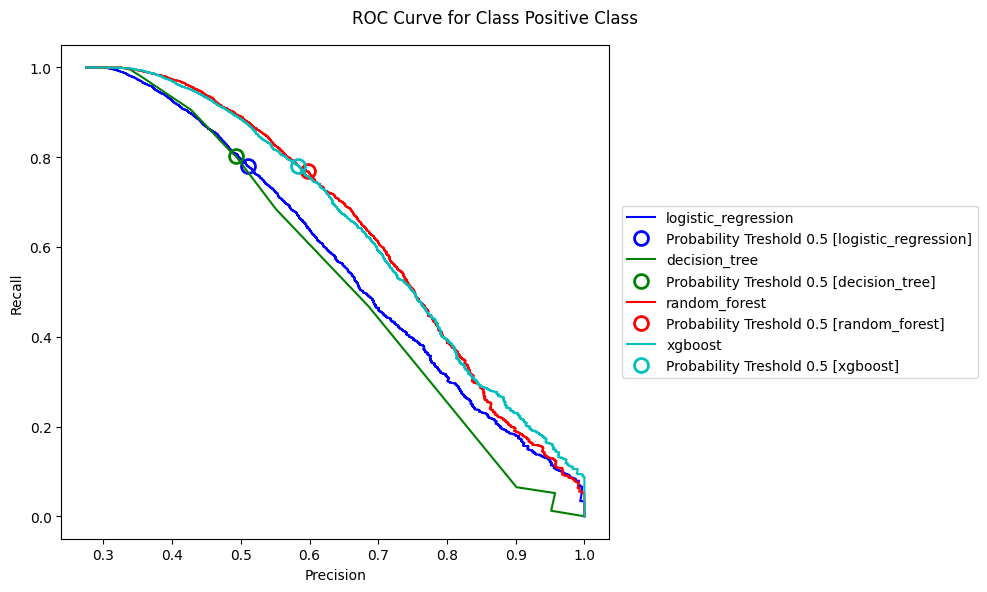

ROC AUC Score for logistic_regression:  83.43%
ROC AUC Score for decision_tree:  82.42%
ROC AUC Score for random_forest:  87.42%
ROC AUC Score for xgboost:  87.15%


In [ ]:
create_roc_auc_curve(figsize = (10, 6),
                     X_test = X_test,
                     X_test_lin = X_test_dummies,
                     y_test = y_test,
                     logistic_regression = logreg_grid,
                     decision_tree = DTC_grid,
                     random_forest = RFC_grid,
                     xgboost = XGB_grid)

In [ ]:
compare_models()

,f1 macro (class 1),precision (class 1),recall (class 1),roc auc,balanced accuracy
model,,,,,
Logistic Regression,73.36,51.01,78.05,74.81,74.81
Decision Tree,71.82,49.23,80.31,74.45,74.45
Random Forest,79.41,59.78,76.82,78.61,78.61
XGBoost,78.67,58.37,78.11,78.50,78.50
MAX POINS :,Random Forest,Random Forest,Decision Tree,Random Forest,Random Forest


In [ ]:
compare_models(pos_label=0)

,f1 macro (class 0),precision (class 0),recall (class 0),roc auc,balanced accuracy
model,,,,,
Logistic Regression,73.36,89.58,71.58,74.81,74.81
Decision Tree,71.82,90.18,68.60,74.45,74.45
Random Forest,79.41,90.14,80.40,78.61,78.61
XGBoost,78.67,90.48,78.88,78.50,78.50
MAX POINS :,Random Forest,XGBoost,Random Forest,Random Forest,Random Forest


from ROC AUC Score and Comparison Score of Negative Class and Positive Class on Model. it can be seen that Random Forest is standing out model that perform better. But from the previous model generation, it seems that Random Forest is Overfitting. So we will try develop our model with least number of features to prevent overfitting.

# 9 Feature Importance

In [ ]:
#define model to analize feature importance
XGB_best = XGBClassifier(gamma = 0.001, max_depth = 7,
                         reg_alpha = 0.001, reg_lambda = 0.001,
                         random_state=0, n_jobs=-1)

XGB_best.fit(df_exp.iloc[:,:-1], df_exp.iloc[:,-1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

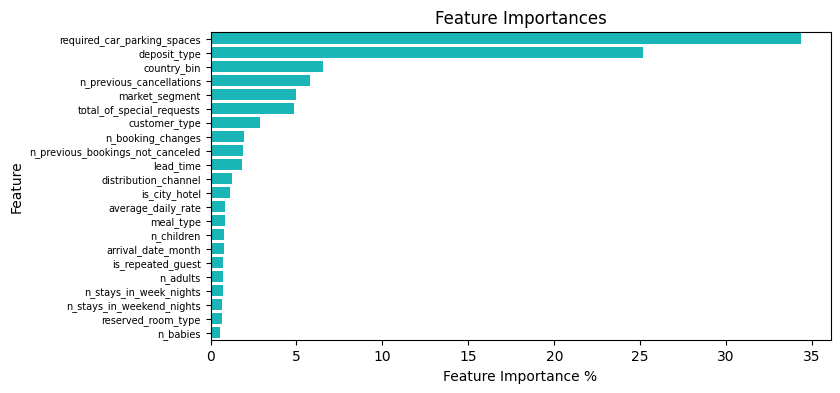

In [ ]:
# Compute feature importances
feature_importances = XGB_best.feature_importances_*100

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance %')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

In [ ]:
print(f"number of feature: {len(X_train.columns)}")

number of feature: 22


In [ ]:
choosen_features_indices = sorted_indices[:10]
choosen_features = list(X_train.columns[choosen_features_indices])
choosen_features

['required_car_parking_spaces',
 'deposit_type',
 'country_bin',
 'n_previous_cancellations',
 'market_segment',
 'total_of_special_requests',
 'customer_type',
 'n_booking_changes',
 'n_previous_bookings_not_canceled',
 'lead_time']

In [ ]:
print(f"The number of Importances retained : {feature_importances[choosen_features_indices].sum():.2f}%")

The number of Importances retained : 90.26%


it can be seen from the plot of feature importances that we have 22 features in total. but when we reduce the number of features to only 10 features that has the most important information , we still has 90% information remains for prediction. So in this case, only 10 features will be selected for further training.

# 10. Create Model with 10 Features

In [ ]:
X_train_se = X_train[choosen_features]
X_train_se.head(3)

print(f"shape {X_train_se.shape}")
X_train_se.head(3)

shape (100922, 10)


,required_car_parking_spaces,deposit_type,country_bin,n_previous_cancellations,market_segment,total_of_special_requests,customer_type,n_booking_changes,n_previous_bookings_not_canceled,lead_time
0,0,0,1,0,5,1,3,0,0,196
1,0,0,2,0,3,0,2,0,5,4
2,0,0,2,0,5,0,3,1,0,118


In [ ]:
X_test_se = X_test[choosen_features]
X_test_se.head(3)

print(f"shape {X_test_se.shape}")
X_test_se.head(3)

shape (17400, 10)


,required_car_parking_spaces,deposit_type,country_bin,n_previous_cancellations,market_segment,total_of_special_requests,customer_type,n_booking_changes,n_previous_bookings_not_canceled,lead_time
29134,1,0,1,0,4,0,3,2,0,152
54282,0,0,2,0,2,0,2,0,7,2
57787,0,0,2,0,6,1,2,0,0,8


In [ ]:
dummy_cols_se = ['deposit_type', 'market_segment', 'customer_type']

In [ ]:
X_train_se_dummies = make_dummies(X_train_se,
                                  dummy_cols=dummy_cols_se)

print(f"shape {X_train_se_dummies.shape}")
X_train_se_dummies.head(3)

shape (100922, 21)


,required_car_parking_spaces,country_bin,n_previous_cancellations,total_of_special_requests,n_booking_changes,n_previous_bookings_not_canceled,lead_time,deposit_type_0,deposit_type_1,deposit_type_2,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,customer_type_0,customer_type_1,customer_type_2,customer_type_3
0,0,1,0,1,0,0,196,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,0,2,0,0,0,5,4,True,False,False,False,False,False,True,False,False,False,False,False,True,False
2,0,2,0,0,1,0,118,True,False,False,False,False,False,False,False,True,False,False,False,False,True


In [ ]:
X_test_se_dummies = make_dummies(X_test_se,
                                 dummy_cols=dummy_cols_se)

print(f"shape {X_test_se_dummies.shape}")
X_test_se_dummies.head(3)

shape (17400, 21)


,required_car_parking_spaces,country_bin,n_previous_cancellations,total_of_special_requests,n_booking_changes,n_previous_bookings_not_canceled,lead_time,deposit_type_0,deposit_type_1,deposit_type_2,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,customer_type_0,customer_type_1,customer_type_2,customer_type_3
29134,1,1,0,0,2,0,152,True,False,False,False,False,False,False,True,False,False,False,False,False,True
54282,0,2,0,0,0,7,2,True,False,False,False,False,True,False,False,False,False,False,False,True,False
57787,0,2,0,1,0,0,8,True,False,False,False,False,False,False,False,False,True,False,False,True,False


## 10.1 Simplified Model Selection

### 10.1.1 Baseline Model - Naive Bayes

In [ ]:
#turn it into sklearn transformer class object
transcaler_se = FunctionTransformer(transform_scaler, kw_args={'transcaler_cols':[col for col in choosen_features if col not in dummy_cols_se]})

In [ ]:
pGaussianNB_se = Pipeline([('tfs', transcaler_se), ('GNB', GaussianNB())])

pGaussianNB_se.fit(X_train_se_dummies, y_train)
classification_reports(pGaussianNB_se, X_train_se_dummies, X_test_se_dummies, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.85      0.26      0.40     50461
           1       0.56      0.96      0.71     50461

    accuracy                           0.61    100922
   macro avg       0.71      0.61      0.55    100922
weighted avg       0.71      0.61      0.55    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.94      0.25      0.39     12616
           1       0.33      0.96      0.49      4784

    accuracy                           0.44     17400
   macro avg       0.64      0.61      0.44     17400
weighted avg       0.77      0.44      0.42     17400






The naive bayes still cannot predict well

### 10.1.2 Linear Model - Logistic Regression

In [ ]:
#Linear Regression Class
logreg = LogisticRegression(random_state=0,
                            solver='saga',
                            max_iter=1000,
                            tol=1e-4,
                            n_jobs=-1)

#Create Pipeline of Linear Regression
pLogreg_se = Pipeline([('tfs', transcaler_se), ('logreg', logreg)])

In [ ]:
#Define GridSearch
logreg_grid_se = GridSearchCV(pLogreg_se,
                              param_grid = logreg_hp,
                              scoring = scoring,
                              refit = refit_strategy,
                              cv = SKF,
                              n_jobs = -1)

#Fit Models
logreg_grid_se.fit(X_train_se_dummies, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.742 (±0.002), precision: 0.735 (±0.002), recall: 0.735 (±0.002)
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.743 (±0.002), precision: 0.736 (±0.002), recall: 0.736 (±0.002)
 {'logreg__C': 0.01, 'logreg__l1_ratio': 0.9, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.743 (±0.002), precision: 0.736 (±0.002), recall: 0.736 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.743 (±0.002), precision: 0.736 (±0.002), recall: 0.736 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.743 (±0.002), precision: 0.736 (±0.002), recall: 0.736 (±0.002)
 {'logreg__C': 0.1, 'logreg__l1_ratio': 0.9, 'logreg__penalty': 'elasticnet'}:
f1-Macro Score: 0.743 (±0.002), precision: 0.736 (±0.002), reca

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('tfs',
                                        FunctionTransformer(func=<function transform_scaler at 0x789768f253f0>,
                                                            kw_args={'transcaler_cols': ['required_car_parking_spaces',
                                                                                         'country_bin',
                                                                                         'n_previous_cancellations',
                                                                                         'total_of_special_requests',
                                                                                         'n_booking_changes',
                                                                                         'n_previous_bookings_not_cance...
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1,
                                                           random_state=0,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid=[{'logreg__C': [0.01, 0.1, 1, 10.0, 100.0],
                          'logreg__l1_ratio': [0.1, 0.5, 0.9],
                          'logreg__penalty': ['elasticnet']},
                         {'logreg__C': [0.01, 0.1, 1, 10.0, 100.0],
                          'logreg__penalty': ['l2', 'l1']}],
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(logreg_grid_se, X_train_se_dummies, X_test_se_dummies, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     50461
           1       0.74      0.76      0.75     50461

    accuracy                           0.74    100922
   macro avg       0.74      0.74      0.74    100922
weighted avg       0.74      0.74      0.74    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     12616
           1       0.51      0.79      0.62      4784

    accuracy                           0.73     17400
   macro avg       0.70      0.75      0.71     17400
weighted avg       0.79      0.73      0.75     17400






for Logistic Regression, when we use only 10 features the result almost not differ when we use 22 features.
but the model performance is still low, and there's clear sign of model underfitting since we remove 10% of information that makes the model more generelize than previous.

### 10.1.3 Tree Based Model - Decision Tree

In [ ]:
#Decision Tree
DTC = DecisionTreeClassifier(random_state=0)

#Define GridSearch
DTC_grid_se = GridSearchCV(DTC,
                           param_grid = DTC_hp,
                           scoring = scoring,
                           refit = refit_strategy,
                           cv = SKF,
                           n_jobs = -1)

#Fit Models
DTC_grid_se.fit(X_train_se, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}:
f1-Macro Score: 0.720 (±0.004), precision: 0.689 (±0.004), recall: 0.689 (±0.004)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 15}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 20}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 25}:
f1-Macro Score: 0.720 (±0.004), precision: 0.690 (±0.003), recall: 0.690 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10}:
f1-Macro Score: 0.725 (±0.005), precision: 0.752 (±0.008), recall: 0.752 (±0.008)
 {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 10, 'max_leaf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_leaf_nodes': [10, 15, 20, 25]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(DTC_grid_se, X_train_se, X_test_se, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     50461
           1       0.71      0.79      0.75     50461

    accuracy                           0.74    100922
   macro avg       0.74      0.74      0.74    100922
weighted avg       0.74      0.74      0.74    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     12616
           1       0.49      0.80      0.61      4784

    accuracy                           0.72     17400
   macro avg       0.70      0.74      0.69     17400
weighted avg       0.79      0.72      0.73     17400






for Decision Tree, when we use only 10 features the result almost not differ when we use 22 features.
but the model performance is still low, and there's clear sign of model underfitting since we remove 10% of information that makes the model more generelize than previous.

### 10.1.4 Tree Based Model - Random Forest

In [ ]:
#Random Forest
RFC = RandomForestClassifier(random_state=0, n_jobs=-1)

#Define GridSearch
RFC_grid_se = GridSearchCV(RFC,
                           param_grid = RFC_hp,
                           scoring = scoring,
                           refit = refit_strategy,
                           cv = SKF,
                           n_jobs = -1)

#Fit Models
RFC_grid_se.fit(X_train_se, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'n_estimators': 50}:
f1-Macro Score: 0.745 (±0.007), precision: 0.720 (±0.018), recall: 0.720 (±0.018)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'n_estimators': 100}:
f1-Macro Score: 0.742 (±0.005), precision: 0.708 (±0.014), recall: 0.708 (±0.014)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 10, 'n_estimators': 50}:
f1-Macro Score: 0.760 (±0.003), precision: 0.742 (±0.002), recall: 0.742 (±0.002)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 10, 'n_estimators': 100}:
f1-Macro Score: 0.761 (±0.002), precision: 0.743 (±0.002), recall: 0.743 (±0.002)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 15, 'n_estimators': 50}:
f1-Macro Score: 0.772 (±0.001), precision: 0.753 (±0.003), recall: 0.753 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'max_depth': 15, 'n_estimators': 100}:
f1-Macro Score: 0.772 (±0.002), precision: 0.753 (±0.003), recall: 0.753 (±0.003)
 {'class_weight': {0: 1, 1: 1}, 'max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(RFC_grid_se, X_train_se, X_test_se, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.85      0.76      0.81     50461
           1       0.78      0.87      0.83     50461

    accuracy                           0.82    100922
   macro avg       0.82      0.82      0.82    100922
weighted avg       0.82      0.82      0.82    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     12616
           1       0.53      0.77      0.63      4784

    accuracy                           0.75     17400
   macro avg       0.72      0.76      0.72     17400
weighted avg       0.80      0.75      0.76     17400






For Random Forest, the overfitting problem seems to be less than the previous. but the model accuracy drops a bit from the previous (-4%).

### 10.1.5 Tree Based Model - XGboost

In [ ]:
#XGboost
XGB = XGBClassifier(random_state=0, n_jobs=-1)

#Define GridSearch
XGB_grid_se = GridSearchCV(XGB,
                           param_grid = XGB_hp,
                           scoring = scoring,
                           refit = refit_strategy,
                           cv = SKF,
                           n_jobs = -1)

#Fit Models
XGB_grid_se.fit(X_train_se, y_train)

All GridSearch Hyperparameter Tuning Test Result:
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 5, 'subsample': 0.5}:
f1-Macro Score: 0.764 (±0.002), precision: 0.750 (±0.002), recall: 0.750 (±0.002)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 5, 'subsample': 0.8}:
f1-Macro Score: 0.765 (±0.002), precision: 0.751 (±0.003), recall: 0.751 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 7, 'subsample': 0.5}:
f1-Macro Score: 0.770 (±0.002), precision: 0.754 (±0.003), recall: 0.754 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 1e-05, 'max_depth': 7, 'subsample': 0.8}:
f1-Macro Score: 0.770 (±0.002), precision: 0.756 (±0.003), recall: 0.756 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 0.001, 'max_depth': 5, 'subsample': 0.5}:
f1-Macro Score: 0.764 (±0.002), precision: 0.750 (±0.003), recall: 0.750 (±0.003)
 {'colsample_bytree': 0.7, 'gamma': 0.001, 'max_depth': 5, 'subsample': 0.8}:
f1-Macro Score: 0.765 (±0.002), precision: 0.751 (±0.003), recall: 0.751

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'gamma': [1e-05, 0.001, 1, 1000.0, 100000.0],
                         'max_depth': [5, 7], 'subsample': [0.5, 0.8]},
             refit=<function refit_strategy at 0x789768f25c60>,
             scoring=['f1_macro', 'precision', 'recall'])

In [ ]:
classification_reports(XGB_grid_se, X_train_se, X_test_se, y_train, y_test)

classification report for train set
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     50461
           1       0.77      0.81      0.79     50461

    accuracy                           0.78    100922
   macro avg       0.78      0.78      0.78    100922
weighted avg       0.78      0.78      0.78    100922




classification report for test set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82     12616
           1       0.55      0.78      0.64      4784

    accuracy                           0.76     17400
   macro avg       0.72      0.77      0.73     17400
weighted avg       0.80      0.76      0.77     17400






## 10.2 Model Performance Comparision After Feature Selection

In [ ]:
models_se = [logreg_grid_se, DTC_grid_se, RFC_grid_se, XGB_grid_se]

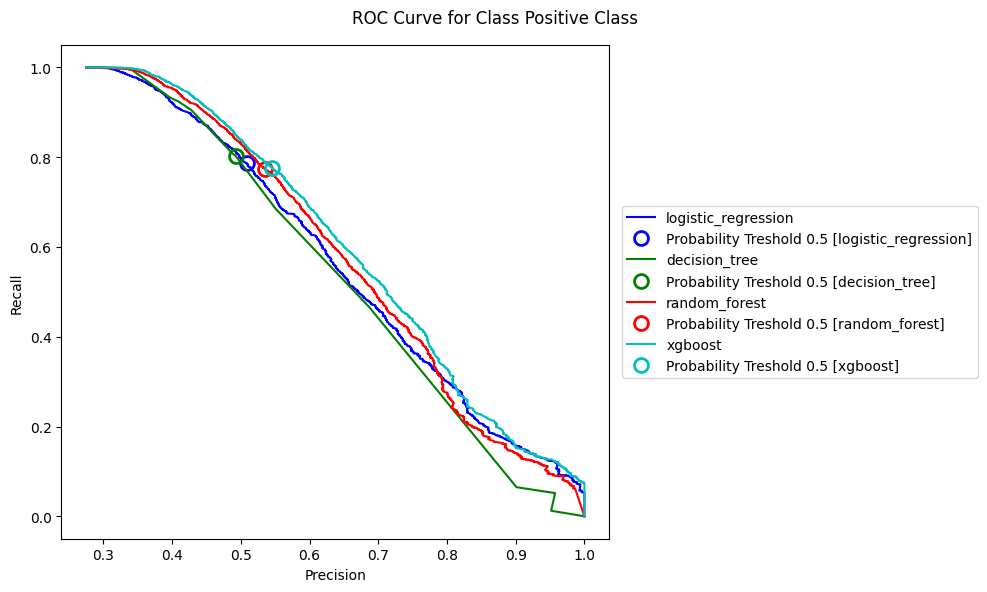

ROC AUC Score for logistic_regression:  83.22%
ROC AUC Score for decision_tree:  82.39%
ROC AUC Score for random_forest:  84.66%
ROC AUC Score for xgboost:  85.49%


In [ ]:
create_roc_auc_curve(figsize = (10, 6),
                     X_test = X_test_se,
                     X_test_lin = X_test_se_dummies,
                     y_test = y_test,
                     logistic_regression = logreg_grid_se,
                     decision_tree = DTC_grid_se,
                     random_forest = RFC_grid_se,
                     xgboost = XGB_grid_se)

In [ ]:
compare_models(models = models_se,
               linear_model = models_se[0],
               X_test = X_test_se,
               X_test_dummies = X_test_se_dummies)

,f1 macro (class 1),precision (class 1),recall (class 1),roc auc (class 1),balanced accuracy (class 1)
model,,,,,
Logistic Regression,61.76,50.84,78.64,74.90,74.90
Decision Tree,61.04,49.23,80.31,74.45,74.45
Random Forest,63.27,53.47,77.47,75.95,75.95
XGBoost,64.08,54.55,77.65,76.56,76.56
MAX POINS :,XGBoost,XGBoost,Decision Tree,XGBoost,XGBoost


In [ ]:
compare_models(models = models_se,
               linear_model = models_se[0],
               X_test = X_test_se,
               X_test_dummies = X_test_se_dummies,
               pos_label = 0)

,f1 macro (class 0),precision (class 0),recall (class 0),roc auc,balanced accuracy
model,,,,,
Logistic Regression,73.22,89.78,71.17,74.90,74.90
Decision Tree,71.82,90.18,68.60,74.45,74.45
Random Forest,75.27,89.70,74.44,75.95,75.95
XGBoost,76.07,89.91,75.47,76.56,76.56
MAX POINS :,XGBoost,Decision Tree,XGBoost,XGBoost,XGBoost


it can be seen after feature reductions, the model that win in any aspect of metrics is XGBoost.

but, the model's score is still low real life implementation. so further development is a must to increase the predictive model.
the recomendation are:

1. add more relevant data that might effect customer's behavior towards cancelling booking they have made
2. use others machine learning models, such as CNN.

# 11. Save Models, Training, and Testing Dataset

## 11.1 Save Models

In [ ]:
#pickling process
for model_name, model in zip(model_names, models_se):
  pickle.dump(model, open(f'{model_name}.pkl', 'wb'))


#unpickling process
"""
models = []

for model_name in model_names:
  models.append(pickle.load(open(f'{model_name}.pkl', 'rb')))

"""

"\nmodels = []\n\nfor model_name in model_names:\n  models.append(pickle.load(open(f'{model_name}.pkl', 'rb')))\n\n"

## 11.2 Save Training Dataset

In [ ]:
training_csv = pd.concat([X_train_se, y_train], axis=1)
training_csv.to_csv('training.csv', index=False)

## 11.3 Save Testing Dataset

In [ ]:
testing_csv = pd.concat([X_test_se, y_test], axis=1)
testing_csv.to_csv('training.csv', index=False)

## 11.4 Save Country Mapping

In [ ]:
country_group.to_csv('country_group.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'a' : np.arange(1,10,2),
    'b' : np.linspace(1,10,5)

})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      int64  
 1   b       5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [ ]:
df.isna().sum()>0

a    False
b    False
dtype: bool